## **Data Cleaning - Pandas**

In [ ]:
import requests
import pandas as pd
marketing_df = pd.read_csv('marketing_campaign_data.csv')
marketing_df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0    342199        1985  Graduation       Together  59011.7        1   
1   8075450        1975      Master         Single   1730.0        1   
2  13664263        1978  Graduation        Married  98584.6        0   
3  16164787        1976  Graduation        Married  74031.5        1   
4  15815139        1981  Graduation       Divorced  52784.2        1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0  2012-11-17        3         0  ...                  3   
1         1  2013-04-10       96         0  ...                  2   
2         0  2014-01-11       99       920  ...                  6   
3         0  2014-06-18       47       265  ...                 11   
4         1  2014-05-20        0        30  ...                  3   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  4             0             0             0             0   
1                  3             0             0             0             0   
2                  3             0             0             0             0   
3                  4             0             0             0             0   
4                  6             0             0             0             0   

   AcceptedCmp2  Response  Complain    Country  
0             0         0         0      Spain  
1             0         0         0      Spain  
2             0         0         0  Australia  
3             0         0         0      Spain  
4             0         0         0     Canada  

[5 rows x 28 columns]

In [ ]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   56000 non-null  int64  
 1   Year_Birth           56000 non-null  int64  
 2   Education            56000 non-null  object 
 3   Marital_Status       56000 non-null  object 
 4   Income               56000 non-null  float64
 5   Kidhome              56000 non-null  int64  
 6   Teenhome             56000 non-null  int64  
 7   Dt_Customer          56000 non-null  object 
 8   Recency              56000 non-null  int64  
 9   MntWines             56000 non-null  int64  
 10  MntFruits            56000 non-null  int64  
 11  MntMeatProducts      56000 non-null  int64  
 12  MntFishProducts      56000 non-null  int64  
 13  MntSweetProducts     56000 non-null  int64  
 14  MntGoldProds         56000 non-null  int64  
 15  NumDealsPurchases    56000 non-null 

In [ ]:
from datetime import datetime

current_year = datetime.now().year
marketing_df['Age'] = current_year - marketing_df['Year_Birth']

# Insert the 'Age' column next to 'ID' (at index 1)
marketing_df.insert(1, 'Age', marketing_df.pop('Age'))

display(marketing_df.head())

ID  Age  Year_Birth   Education Marital_Status   Income  Kidhome  \
0    342199   41        1985  Graduation       Together  59011.7        1   
1   8075450   51        1975      Master         Single   1730.0        1   
2  13664263   48        1978  Graduation        Married  98584.6        0   
3  16164787   50        1976  Graduation        Married  74031.5        1   
4  15815139   45        1981  Graduation       Divorced  52784.2        1   

   Teenhome Dt_Customer  Recency  ...  NumStorePurchases  NumWebVisitsMonth  \
0         0  2012-11-17        3  ...                  3                  4   
1         1  2013-04-10       96  ...                  2                  3   
2         0  2014-01-11       99  ...                  6                  3   
3         0  2014-06-18       47  ...                 11                  4   
4         1  2014-05-20        0  ...                  3                  6   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Response  Complain    Country  
0         0         0      Spain  
1         0         0      Spain  
2         0         0  Australia  
3         0         0      Spain  
4         0         0     Canada  

[5 rows x 29 columns]

In [ ]:
from datetime import datetime

# Convert 'Dt_Customer' to datetime objects
marketing_df['Dt_Customer'] = pd.to_datetime(marketing_df['Dt_Customer'])

# Calculate tenure in days
marketing_df['Tenure_Days'] = (datetime.now() - marketing_df['Dt_Customer']).dt.days

# Convert tenure from days to months
marketing_df['Customer_Tenure_months'] = (marketing_df['Tenure_Days'] / 30.44).astype(int)

# Get the index of the 'Age' column
age_column_index = marketing_df.columns.get_loc('Age')

# Pop 'Customer_Tenure' column and insert it after 'Age'
marketing_df.insert(age_column_index + 1, 'Customer_Tenure_months', marketing_df.pop('Customer_Tenure_months'))

# Drop the temporary 'Tenure_Days' column
marketing_df = marketing_df.drop(columns=['Tenure_Days'])

display(marketing_df.head())

ID  Age  Customer_Tenure_months  Year_Birth   Education  \
0    342199   41                     158        1985  Graduation   
1   8075450   51                     153        1975      Master   
2  13664263   48                     144        1978  Graduation   
3  16164787   50                     139        1976  Graduation   
4  15815139   45                     140        1981  Graduation   

  Marital_Status   Income  Kidhome  Teenhome Dt_Customer  ...  \
0       Together  59011.7        1         0  2012-11-17  ...   
1         Single   1730.0        1         1  2013-04-10  ...   
2        Married  98584.6        0         0  2014-01-11  ...   
3        Married  74031.5        1         0  2014-06-18  ...   
4       Divorced  52784.2        1         1  2014-05-20  ...   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  3                  4             0             0   
1                  2                  3             0             0   
2                  6                  3             0             0   
3                 11                  4             0             0   
4                  3                  6             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain    Country  
0             0             0             0         0         0      Spain  
1             0             0             0         0         0      Spain  
2             0             0             0         0         0  Australia  
3             0             0             0         0         0      Spain  
4             0             0             0         0         0     Canada  

[5 rows x 30 columns]

In [ ]:
marketing_df['Children'] = marketing_df['Kidhome'] + marketing_df['Teenhome']

display(marketing_df[['ID', 'Kidhome', 'Teenhome', 'Children']].head())

ID  Kidhome  Teenhome  Children
0    342199        1         0         1
1   8075450        1         1         2
2  13664263        0         0         0
3  16164787        1         0         1
4  15815139        1         1         2

In [ ]:
marketing_df = marketing_df.rename(columns={'Dt_Customer': 'Customer_Since'})

display(marketing_df.head())

ID  Age  Customer_Tenure_months  Year_Birth   Education  \
0    342199   41                     158        1985  Graduation   
1   8075450   51                     153        1975      Master   
2  13664263   48                     144        1978  Graduation   
3  16164787   50                     139        1976  Graduation   
4  15815139   45                     140        1981  Graduation   

  Marital_Status   Income  Kidhome  Teenhome Customer_Since  ...  \
0       Together  59011.7        1         0     2012-11-17  ...   
1         Single   1730.0        1         1     2013-04-10  ...   
2        Married  98584.6        0         0     2014-01-11  ...   
3        Married  74031.5        1         0     2014-06-18  ...   
4       Divorced  52784.2        1         1     2014-05-20  ...   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  4             0             0             0             0   
1                  3             0             0             0             0   
2                  3             0             0             0             0   
3                  4             0             0             0             0   
4                  6             0             0             0             0   

   AcceptedCmp2  Response  Complain    Country  Children  
0             0         0         0      Spain         1  
1             0         0         0      Spain         2  
2             0         0         0  Australia         0  
3             0         0         0      Spain         1  
4             0         0         0     Canada         2  

[5 rows x 31 columns]

In [ ]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      56000 non-null  int64         
 1   Age                     56000 non-null  int64         
 2   Customer_Tenure_months  56000 non-null  int64         
 3   Year_Birth              56000 non-null  int64         
 4   Education               56000 non-null  object        
 5   Marital_Status          56000 non-null  object        
 6   Income                  56000 non-null  float64       
 7   Kidhome                 56000 non-null  int64         
 8   Teenhome                56000 non-null  int64         
 9   Customer_Since          56000 non-null  datetime64[ns]
 10  Recency                 56000 non-null  int64         
 11  MntWines                56000 non-null  int64         
 12  MntFruits               56000 non-null  int64 

In [ ]:
marketing_df = marketing_df.drop(columns=['Kidhome','Teenhome'])

display(marketing_df.head())

ID  Age  Customer_Tenure_months  Year_Birth   Education  \
0    342199   41                     158        1985  Graduation   
1   8075450   51                     153        1975      Master   
2  13664263   48                     144        1978  Graduation   
3  16164787   50                     139        1976  Graduation   
4  15815139   45                     140        1981  Graduation   

  Marital_Status   Income Customer_Since  Recency  MntWines  ...  \
0       Together  59011.7     2012-11-17        3         0  ...   
1         Single   1730.0     2013-04-10       96         0  ...   
2        Married  98584.6     2014-01-11       99       920  ...   
3        Married  74031.5     2014-06-18       47       265  ...   
4       Divorced  52784.2     2014-05-20        0        30  ...   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  4             0             0             0             0   
1                  3             0             0             0             0   
2                  3             0             0             0             0   
3                  4             0             0             0             0   
4                  6             0             0             0             0   

   AcceptedCmp2  Response  Complain    Country  Children  
0             0         0         0      Spain         1  
1             0         0         0      Spain         2  
2             0         0         0  Australia         0  
3             0         0         0      Spain         1  
4             0         0         0     Canada         2  

[5 rows x 29 columns]

In [ ]:
# Identify columns that start with 'Mnt'
mnt_columns = [col for col in marketing_df.columns if col.startswith('Mnt')]

# Calculate the sum of these columns to create 'Total_spends'
marketing_df['Total_spends'] = marketing_df[mnt_columns].sum(axis=1)

# Get the index of the 'Income' column
income_column_index = marketing_df.columns.get_loc('Income')

# Insert 'Total_spends' next to 'Income'
marketing_df.insert(income_column_index + 1, 'Total_spends', marketing_df.pop('Total_spends'))

display(marketing_df.head())

ID  Age  Customer_Tenure_months  Year_Birth   Education  \
0    342199   41                     158        1985  Graduation   
1   8075450   51                     153        1975      Master   
2  13664263   48                     144        1978  Graduation   
3  16164787   50                     139        1976  Graduation   
4  15815139   45                     140        1981  Graduation   

  Marital_Status   Income  Total_spends Customer_Since  Recency  ...  \
0       Together  59011.7            69     2012-11-17        3  ...   
1         Single   1730.0            39     2013-04-10       96  ...   
2        Married  98584.6          1512     2014-01-11       99  ...   
3        Married  74031.5           478     2014-06-18       47  ...   
4       Divorced  52784.2           330     2014-05-20        0  ...   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  4             0             0             0             0   
1                  3             0             0             0             0   
2                  3             0             0             0             0   
3                  4             0             0             0             0   
4                  6             0             0             0             0   

   AcceptedCmp2  Response  Complain    Country  Children  
0             0         0         0      Spain         1  
1             0         0         0      Spain         2  
2             0         0         0  Australia         0  
3             0         0         0      Spain         1  
4             0         0         0     Canada         2  

[5 rows x 30 columns]

In [ ]:
# Rename the column
marketing_df = marketing_df.rename(columns={'NumWebVisitsMonth': 'Num_Webvisits'})

# Get the index of the 'Total_spends' column
total_spends_column_index = marketing_df.columns.get_loc('Total_spends')

# Pop 'Num_Webvisits' column and insert it after 'Total_spends'
marketing_df.insert(total_spends_column_index + 1, 'Num_Webvisits', marketing_df.pop('Num_Webvisits'))

display(marketing_df.head())

ID  Age  Customer_Tenure_months  Year_Birth   Education  \
0    342199   41                     158        1985  Graduation   
1   8075450   51                     153        1975      Master   
2  13664263   48                     144        1978  Graduation   
3  16164787   50                     139        1976  Graduation   
4  15815139   45                     140        1981  Graduation   

  Marital_Status   Income  Total_spends  Num_Webvisits Customer_Since  ...  \
0       Together  59011.7            69              4     2012-11-17  ...   
1         Single   1730.0            39              3     2013-04-10  ...   
2        Married  98584.6          1512              3     2014-01-11  ...   
3        Married  74031.5           478              4     2014-06-18  ...   
4       Divorced  52784.2           330              6     2014-05-20  ...   

   NumStorePurchases  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  3             0             0             0             0   
1                  2             0             0             0             0   
2                  6             0             0             0             0   
3                 11             0             0             0             0   
4                  3             0             0             0             0   

   AcceptedCmp2  Response  Complain    Country  Children  
0             0         0         0      Spain         1  
1             0         0         0      Spain         2  
2             0         0         0  Australia         0  
3             0         0         0      Spain         1  
4             0         0         0     Canada         2  

[5 rows x 30 columns]

In [ ]:
# Identify columns that start with 'Num' but exclude 'Num_Webvisits'
num_columns = [col for col in marketing_df.columns if col.startswith('Num') and col != 'Num_Webvisits']

# Calculate the sum of these columns to create 'Total_Purchase'
marketing_df['Total_Purchase'] = marketing_df[num_columns].sum(axis=1)

# Get the index of the 'Total_spends' column
total_spends_column_index = marketing_df.columns.get_loc('Total_spends')

# Insert 'Total_Purchase' next to 'Total_spends'
marketing_df.insert(total_spends_column_index + 1, 'Total_Purchase', marketing_df.pop('Total_Purchase'))

display(marketing_df.head())

ID  Age  Customer_Tenure_months  Year_Birth   Education  \
0    342199   41                     158        1985  Graduation   
1   8075450   51                     153        1975      Master   
2  13664263   48                     144        1978  Graduation   
3  16164787   50                     139        1976  Graduation   
4  15815139   45                     140        1981  Graduation   

  Marital_Status   Income  Total_spends  Total_Purchase  Num_Webvisits  ...  \
0       Together  59011.7            69              13              4  ...   
1         Single   1730.0            39               4              3  ...   
2        Married  98584.6          1512              12              3  ...   
3        Married  74031.5           478              16              4  ...   
4       Divorced  52784.2           330               9              6  ...   

  NumStorePurchases  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                 3             0             0             0             0   
1                 2             0             0             0             0   
2                 6             0             0             0             0   
3                11             0             0             0             0   
4                 3             0             0             0             0   

   AcceptedCmp2  Response  Complain    Country  Children  
0             0         0         0      Spain         1  
1             0         0         0      Spain         2  
2             0         0         0  Australia         0  
3             0         0         0      Spain         1  
4             0         0         0     Canada         2  

[5 rows x 31 columns]

In [ ]:
# Display descriptive statistics for numerical columns to identify potential outliers
display(marketing_df.describe())

ID           Age  Customer_Tenure_months    Year_Birth  \
count  5.600000e+04  56000.000000            56000.000000  56000.000000   
mean   8.389352e+06     54.333304              149.076750   1971.666696   
min    3.600000e+01     30.000000              139.000000   1936.000000   
25%    4.187372e+06     45.000000              142.000000   1963.000000   
50%    8.383784e+06     53.000000              149.000000   1973.000000   
75%    1.258576e+07     63.000000              156.000000   1981.000000   
max    1.677716e+07     90.000000              162.000000   1996.000000   
std    4.844638e+06     12.211066                7.204716     12.211066   

              Income  Total_spends  Total_Purchase  Num_Webvisits  \
count   56000.000000  56000.000000    56000.000000   56000.000000   
mean    57252.189521    640.334571       13.238018       5.170107   
min      1730.000000      0.000000        0.000000       0.000000   
25%     28252.025000    103.000000        9.000000       3.000000   
50%     58838.550000    441.500000       13.000000       6.000000   
75%     86930.650000   1020.000000       17.000000       7.000000   
max    258027.500000   3431.000000       46.000000      10.000000   
std     34307.247999    622.643744        5.680444       2.555911   

                      Customer_Since       Recency  ...  NumCatalogPurchases  \
count                          56000  56000.000000  ...         56000.000000   
mean   2013-08-15 07:30:18.514285568     63.221107  ...             2.110750   
min              2012-07-30 00:00:00      0.000000  ...             0.000000   
25%              2013-01-24 00:00:00     35.000000  ...             0.000000   
50%              2013-08-19 00:00:00     71.000000  ...             1.000000   
75%              2014-03-10 00:00:00     93.000000  ...             3.000000   
max              2014-06-29 00:00:00     99.000000  ...            14.000000   
std                              NaN     31.157066  ...             2.357824   

       NumStorePurchases  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count       56000.000000  56000.000000  56000.000000  56000.000000   
mean            4.706411      0.062393      0.056821      0.045661   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             4.000000      0.000000      0.000000      0.000000   
75%             6.000000      0.000000      0.000000      0.000000   
max            13.000000      1.000000      1.000000      1.000000   
std             2.896366      0.241870      0.231503      0.208750   

       AcceptedCmp1  AcceptedCmp2      Response      Complain      Children  
count  56000.000000  56000.000000  56000.000000  56000.000000  56000.000000  
mean       0.134446      0.014411      0.147589      0.007625      0.902054  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000      1.000000  
75%        0.000000      0.000000      0.000000      0.000000      1.000000  
max        1.000000      1.000000      1.000000      1.000000      4.000000  
std        0.341134      0.119178      0.354696      0.086988      0.739888  

[8 rows x 28 columns]

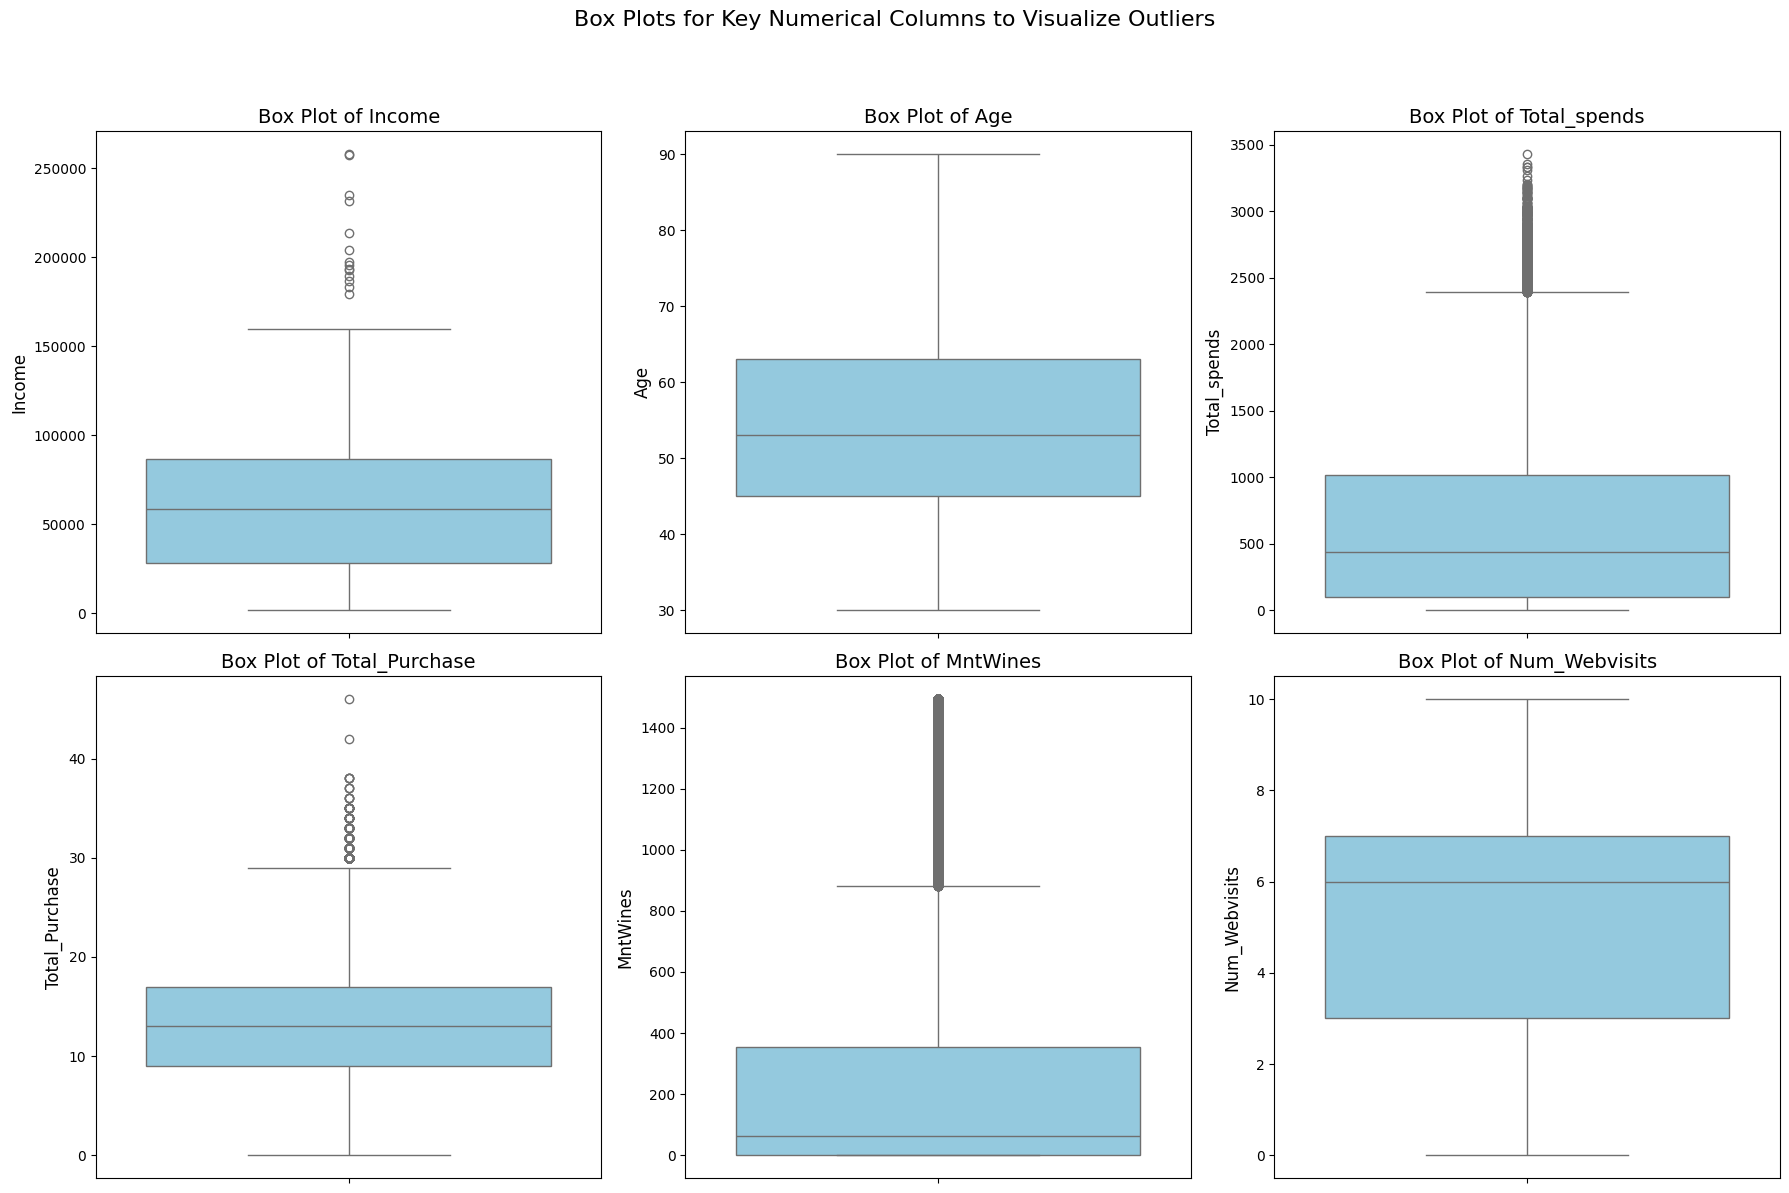

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key numerical columns for outlier visualization
numerical_cols_for_outliers = ['Income', 'Age', 'Total_spends', 'Total_Purchase', 'MntWines', 'Num_Webvisits']

# Set up the matplotlib figure and axes for a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten() # Flatten the 2x3 array of axes for easy iteration

# Create a box plot for each selected numerical column
for i, col in enumerate(numerical_cols_for_outliers):
    sns.boxplot(y=marketing_df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {col}', fontsize=14)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].tick_params(axis='y', labelsize=10)

plt.suptitle('Box Plots for Key Numerical Columns to Visualize Outliers', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

In [ ]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      56000 non-null  int64         
 1   Age                     56000 non-null  int64         
 2   Customer_Tenure_months  56000 non-null  int64         
 3   Year_Birth              56000 non-null  int64         
 4   Education               56000 non-null  object        
 5   Marital_Status          56000 non-null  object        
 6   Income                  56000 non-null  float64       
 7   Total_spends            56000 non-null  int64         
 8   Total_Purchase          56000 non-null  int64         
 9   Num_Webvisits           56000 non-null  int64         
 10  Customer_Since          56000 non-null  datetime64[ns]
 11  Recency                 56000 non-null  int64         
 12  MntWines                56000 non-null  int64 

In [ ]:
print("Before outlier treatment:")
display(marketing_df[['Age', 'Income']].describe())

# Function to detect and replace outliers using IQR
def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    if not outliers.empty:
        mean_value = df[column].mean()
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
        print(f"\nOutliers in '{column}' detected and replaced with mean ({mean_value:.2f}). Total {len(outliers)} outliers.")
    else:
        print(f"\nNo significant outliers found in '{column}' using IQR method.")
    return df

# Apply the function to 'Age' column
marketing_df = replace_outliers_with_mean(marketing_df, 'Age')

# Apply the function to 'Income' column
marketing_df = replace_outliers_with_mean(marketing_df, 'Income')

print("\nAfter outlier treatment:")
display(marketing_df[['Age', 'Income']].describe())

Before outlier treatment:


Age         Income
count  56000.000000   56000.000000
mean      54.333304   57252.189521
std       12.211066   34307.247999
min       30.000000    1730.000000
25%       45.000000   28252.025000
50%       53.000000   58838.550000
75%       63.000000   86930.650000
max       90.000000  258027.500000


No significant outliers found in 'Age' using IQR method.

Outliers in 'Income' detected and replaced with mean (57252.19). Total 14 outliers.

After outlier treatment:


Age         Income
count  56000.000000   56000.000000
mean      54.333304   57214.371178
std       12.211066   34221.353525
min       30.000000    1730.000000
25%       45.000000   28252.025000
50%       53.000000   58818.000000
75%       63.000000   86905.925000
max       90.000000  159700.000000

In [ ]:
display(marketing_df.head())

ID  Age  Customer_Tenure_months  Year_Birth   Education  \
0    342199   41                     158        1985  Graduation   
1   8075450   51                     153        1975      Master   
2  13664263   48                     144        1978  Graduation   
3  16164787   50                     139        1976  Graduation   
4  15815139   45                     140        1981  Graduation   

  Marital_Status   Income  Total_spends  Total_Purchase  Num_Webvisits  ...  \
0       Together  59011.7            69              13              4  ...   
1         Single   1730.0            39               4              3  ...   
2        Married  98584.6          1512              12              3  ...   
3        Married  74031.5           478              16              4  ...   
4       Divorced  52784.2           330               9              6  ...   

  NumStorePurchases  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                 3             0             0             0             0   
1                 2             0             0             0             0   
2                 6             0             0             0             0   
3                11             0             0             0             0   
4                 3             0             0             0             0   

   AcceptedCmp2  Response  Complain    Country  Children  
0             0         0         0      Spain         1  
1             0         0         0      Spain         2  
2             0         0         0  Australia         0  
3             0         0         0      Spain         1  
4             0         0         0     Canada         2  

[5 rows x 31 columns]

## Segmentation **Task**

In [ ]:
marketing_df['Income_Segment'] = marketing_df['Income'].apply(lambda x: 'High Income' if x > 75000 else 'Other')

display(marketing_df[['Income', 'Income_Segment']].head())

Income Income_Segment
0  59011.7          Other
1   1730.0          Other
2  98584.6    High Income
3  74031.5          Other
4  52784.2          Other

In [ ]:
marketing_df['Age_Segment'] = marketing_df['Age'].apply(lambda x: 'Young Customer' if x < 35 else 'Old Customer')

display(marketing_df[['Age', 'Age_Segment']].head())

Age   Age_Segment
0   41  Old Customer
1   51  Old Customer
2   48  Old Customer
3   50  Old Customer
4   45  Old Customer

In [ ]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

marketing_df['Campaign_Responder'] = marketing_df[campaign_cols].any(axis=1).map({True: 'Yes', False: 'No'})

display(marketing_df[campaign_cols + ['Campaign_Responder']].head())

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Response Campaign_Responder  
0         0                 No  
1         0                 No  
2         0                 No  
3         0                 No  
4         0                 No

In [ ]:
# Filter the DataFrame
campaign_responders_df = marketing_df[marketing_df['Campaign_Responder'] == 'Yes']

display(campaign_responders_df.head())

ID  Age  Customer_Tenure_months  Year_Birth   Education  \
9    7068405   58                     139        1968  Graduation   
15   9974730   74                     146        1952      Master   
17   2275327   60                     153        1966         PhD   
18   9413456   47                     139        1979  Graduation   
20  13545753   44                     161        1982      Master   

   Marital_Status    Income  Total_spends  Total_Purchase  Num_Webvisits  ...  \
9        Together   54240.7           251               4              0  ...   
15        Married  105437.3          1415              19              7  ...   
17         Single  103586.0          1567              13              3  ...   
18          Alone   47610.5           636              15              2  ...   
20       Together  101718.5           437              26              0  ...   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain    Country  \
9             0             1             0         0         0        USA   
15            0             0             0         1         0  Australia   
17            0             0             0         1         0      Spain   
18            0             0             0         0         0  Australia   
20            0             1             0         0         0      Spain   

    Children  Income_Segment   Age_Segment  Campaign_Responder  
9          2           Other  Old Customer                 Yes  
15         0     High Income  Old Customer                 Yes  
17         0     High Income  Old Customer                 Yes  
18         0           Other  Old Customer                 Yes  
20         0     High Income  Old Customer                 Yes  

[5 rows x 34 columns]

In [ ]:

bins = [-1, 4, 10, 15, float('inf')]
labels = ['low', 'intermediate', 'High', 'very high']

marketing_df['Web_Engagement'] = pd.cut(marketing_df['Num_Webvisits'], bins=bins, labels=labels, right=True)

display(marketing_df[['Num_Webvisits', 'Web_Engagement']].head())

Num_Webvisits Web_Engagement
0              4            low
1              3            low
2              3            low
3              4            low
4              6   intermediate

In [ ]:
marketing_df['Customer_Type'] = marketing_df['Children'].apply(lambda x: 'Family Customer' if x > 0 else 'Other')

display(marketing_df[['Children', 'Customer_Type']].head())

Children    Customer_Type
0         1  Family Customer
1         2  Family Customer
2         0            Other
3         1  Family Customer
4         2  Family Customer

In [ ]:

bins = [-1, 350, 950, float('inf')]
labels = ['low spender', 'High spender', 'very high spender']

# Create the 'Spending_Type' column using pd.cut
marketing_df['Spending_Type'] = pd.cut(marketing_df['Total_spends'], bins=bins, labels=labels, right=True)

# Display the updated DataFrame with the new column
display(marketing_df[['Total_spends', 'Spending_Type']].head())

Total_spends      Spending_Type
0            69        low spender
1            39        low spender
2          1512  very high spender
3           478       High spender
4           330        low spender

In [ ]:
# Filter the DataFrame to show only 'High spender'
filtered_spenders_df = marketing_df[marketing_df['Spending_Type'] == 'High spender']

# Display the head of the filtered DataFrame
display(filtered_spenders_df.head())

ID  Age  Customer_Tenure_months  Year_Birth   Education  \
3   16164787   50                     139        1976  Graduation   
6    2330269   66                     149        1960       Basic   
18   9413456   47                     139        1979  Graduation   
20  13545753   44                     161        1982      Master   
24  16663364   65                     162        1961       Basic   

   Marital_Status    Income  Total_spends  Total_Purchase  Num_Webvisits  ...  \
3         Married   74031.5           478              16              4  ...   
6        Divorced  111080.3           843              14              2  ...   
18          Alone   47610.5           636              15              2  ...   
20       Together  101718.5           437              26              0  ...   
24          Widow   16379.1           400              20              4  ...   

   Response  Complain    Country  Children  Income_Segment   Age_Segment  \
3         0         0      Spain         1           Other  Old Customer   
6         0         0    Germany         0     High Income  Old Customer   
18        0         0  Australia         0           Other  Old Customer   
20        0         0      Spain         0     High Income  Old Customer   
24        0         0    Germany         0           Other  Old Customer   

    Campaign_Responder  Web_Engagement    Customer_Type  Spending_Type  
3                   No             low  Family Customer   High spender  
6                   No             low            Other   High spender  
18                 Yes             low            Other   High spender  
20                 Yes             low            Other   High spender  
24                  No             low            Other   High spender  

[5 rows x 37 columns]

In [ ]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      56000 non-null  int64         
 1   Age                     56000 non-null  int64         
 2   Customer_Tenure_months  56000 non-null  int64         
 3   Year_Birth              56000 non-null  int64         
 4   Education               56000 non-null  object        
 5   Marital_Status          56000 non-null  object        
 6   Income                  56000 non-null  float64       
 7   Total_spends            56000 non-null  int64         
 8   Total_Purchase          56000 non-null  int64         
 9   Num_Webvisits           56000 non-null  int64         
 10  Customer_Since          56000 non-null  datetime64[ns]
 11  Recency                 56000 non-null  int64         
 12  MntWines                56000 non-null  int64 

In [ ]:
marketing_df.to_csv('marketing_campaign_data_cleaned.csv', index=False)
print('DataFrame saved to marketing_campaign_data_cleaned.csv')

DataFrame saved to marketing_campaign_data_cleaned.csv


## **Column Drop**

In [ ]:
marketing_df = marketing_df.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp2','AcceptedCmp1','Year_Birth','Customer_Since'])

display(marketing_df.head())

ID  Age  Customer_Tenure_months   Education Marital_Status   Income  \
0    342199   41                     158  Graduation       Together  59011.7   
1   8075450   51                     153      Master         Single   1730.0   
2  13664263   48                     144  Graduation        Married  98584.6   
3  16164787   50                     139  Graduation        Married  74031.5   
4  15815139   45                     140  Graduation       Divorced  52784.2   

   Total_spends  Total_Purchase  Num_Webvisits  Recency  ...  Response  \
0            69              13              4        3  ...         0   
1            39               4              3       96  ...         0   
2          1512              12              3       99  ...         0   
3           478              16              4       47  ...         0   
4           330               9              6        0  ...         0   

   Complain    Country  Children  Income_Segment   Age_Segment  \
0         0      Spain         1           Other  Old Customer   
1         0      Spain         2           Other  Old Customer   
2         0  Australia         0     High Income  Old Customer   
3         0      Spain         1           Other  Old Customer   
4         0     Canada         2           Other  Old Customer   

  Campaign_Responder  Web_Engagement    Customer_Type      Spending_Type  
0                 No             low  Family Customer        low spender  
1                 No             low  Family Customer        low spender  
2                 No             low            Other  very high spender  
3                 No             low  Family Customer       High spender  
4                 No    intermediate  Family Customer        low spender  

[5 rows x 24 columns]

In [ ]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID                      56000 non-null  int64   
 1   Age                     56000 non-null  int64   
 2   Customer_Tenure_months  56000 non-null  int64   
 3   Education               56000 non-null  object  
 4   Marital_Status          56000 non-null  object  
 5   Income                  56000 non-null  float64 
 6   Total_spends            56000 non-null  int64   
 7   Total_Purchase          56000 non-null  int64   
 8   Num_Webvisits           56000 non-null  int64   
 9   Recency                 56000 non-null  int64   
 10  NumDealsPurchases       56000 non-null  int64   
 11  NumWebPurchases         56000 non-null  int64   
 12  NumCatalogPurchases     56000 non-null  int64   
 13  NumStorePurchases       56000 non-null  int64   
 14  Response              

In [ ]:
marketing_df.to_csv('marketing_campaign_data_dropped.csv', index=False)
print('DataFrame saved successfully to marketing_campaign_data_dropped.csv')

DataFrame saved successfully to marketing_campaign_data_dropped.csv


## SQL **Queries**

In [ ]:
import pandas as pd
import sqlite3

# Load the CSV file into a pandas DataFrame
df_db = pd.read_csv('marketing_campaign_data_dropped.csv')

# Create a SQLite database connection
conn = sqlite3.connect('marketing_campaign.db')

# Write the DataFrame to a SQL table
df_db.to_sql('marketing_data', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

print('SQLite database marketing_campaign.db created successfully with table marketing_data.')

SQLite database marketing_campaign.db created successfully with table marketing_data.


High **Income**

In [ ]:
import sqlite3
import pandas as pd
from tabulate import tabulate

# Create a SQLite database connection
conn = sqlite3.connect('marketing_campaign.db')

# Define the appropriate columns to select
selected_columns = [
    'ID', 'Age', 'Education', 'Marital_Status', 'Income',
    'Customer_Tenure_months', 'Total_spends', 'Total_Purchase',
    'Income_Segment', 'Age_Segment', 'Spending_Type'
]

# Define the SQL query with selected columns
sql_query_selected = f"SELECT {', '.join(selected_columns)} FROM marketing_data WHERE Income > 75000"

# Execute the query and load the results into a pandas DataFrame
high_income_customers_selected_df = pd.read_sql_query(sql_query_selected, conn)

# Close the connection
conn.close()

print('Customers with High Income:')
print(tabulate(high_income_customers_selected_df.head(), headers='keys', tablefmt='psql'))

Customers with High Income:
+----+----------+-------+-------------+------------------+----------+--------------------------+----------------+------------------+------------------+---------------+-------------------+
|    |       ID |   Age | Education   | Marital_Status   |   Income |   Customer_Tenure_months |   Total_spends |   Total_Purchase | Income_Segment   | Age_Segment   | Spending_Type     |
|----+----------+-------+-------------+------------------+----------+--------------------------+----------------+------------------+------------------+---------------+-------------------|
|  0 | 13664263 |    48 | Graduation  | Married          |  98584.6 |                      144 |           1512 |               12 | High Income      | Old Customer  | very high spender |
|  1 |  2330269 |    66 | Basic       | Divorced         | 111080   |                      149 |            843 |               14 | High Income      | Old Customer  | High spender      |
|  2 |   923176 |    61 | Master

Income vs **Spends** **bold text**

In [ ]:
import sqlite3
import pandas as pd
from tabulate import tabulate

# Create a SQLite database connection
conn = sqlite3.connect('marketing_campaign.db')

# Define the columns to select, including the calculated spending ratio
selected_columns = [
    'ID', 'Income', 'Total_spends', 'Total_Purchase',
    'Income_Segment', 'Age_Segment', 'Spending_Type',
    'CAST(Total_spends AS REAL) / Income AS Spending_Ratio'
]

# Define the SQL query to calculate spending ratio and filter for 'High Spenders'
sql_query_high_spenders = f"""SELECT {', '.join(selected_columns)},
       CAST(Total_spends AS REAL) / Income AS Spending_Ratio
FROM marketing_data
WHERE CAST(Total_spends AS REAL) / Income > 0.5
"""

# Execute the query and load the results into a pandas DataFrame
high_spender_customers_df = pd.read_sql_query(sql_query_high_spenders, conn)

# Close the connection
conn.close()

print('High Spender Customers (Spending_Ratio > 0.5):')
print(tabulate(high_spender_customers_df.head(50), headers='keys', tablefmt='grid'))

High Spender Customers (Spending_Ratio > 0.5):
+----+----------+----------+----------------+------------------+------------------+---------------+-------------------+------------------+------------------+
|    |       ID |   Income |   Total_spends |   Total_Purchase | Income_Segment   | Age_Segment   | Spending_Type     |   Spending_Ratio |   Spending_Ratio |
+====+==========+==========+================+==================+==================+===============+===================+==================+==================+
|  0 | 13536032 |   1730   |            940 |                6 | Other            | Old Customer  | High spender      |         0.543353 |         0.543353 |
+----+----------+----------+----------------+------------------+------------------+---------------+-------------------+------------------+------------------+
|  1 | 14907319 |   1730   |            923 |                7 | Other            | Old Customer  | High spender      |         0.533526 |         0.533526 |
+----

**Purchase Type**

In [ ]:
import sqlite3
import pandas as pd
from tabulate import tabulate

# Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# Get column names dynamically from the 'marketing_data' table
cursor = conn.execute("PRAGMA table_info(marketing_data)")
columns = [col[1] for col in cursor.fetchall()]

# Filter columns to include those starting with 'Num' but exclude 'Num_Webvisits'
purchase_cols = [col for col in columns if col.startswith('Num') and col != 'Num_Webvisits']

# Construct the SQL query with the identified purchase columns
sql_query = f"SELECT {', '.join(purchase_cols)} FROM marketing_data"

# Execute the query and load the results into a pandas DataFrame
purchase_types_df = pd.read_sql_query(sql_query, conn)

# Calculate the sum of each purchase type column
total_purchase_counts = purchase_types_df.sum()

# Close the database connection
conn.close()

print('Total counts for each purchase type:')
print(tabulate(total_purchase_counts.to_frame(), headers=['Purchase Type', 'Total Count'], tablefmt='grid'))

Total counts for each purchase type:
+---------------------+---------------+
| Purchase Type       |   Total Count |
+=====================+===============+
| NumDealsPurchases   |        121630 |
+---------------------+---------------+
| NumWebPurchases     |        237938 |
+---------------------+---------------+
| NumCatalogPurchases |        118202 |
+---------------------+---------------+
| NumStorePurchases   |        263559 |
+---------------------+---------------+


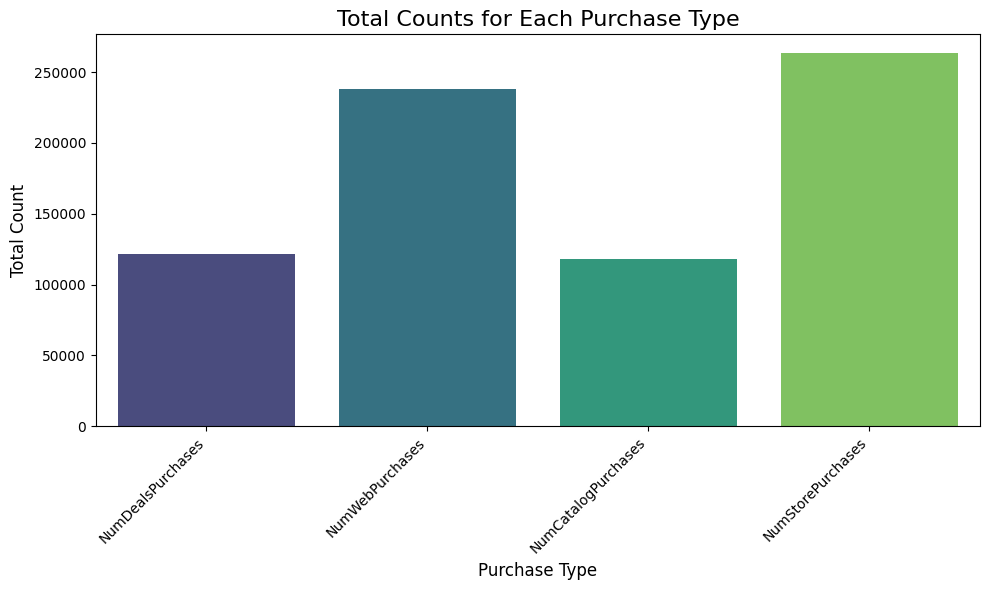

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Series to a DataFrame for easier plotting with seaborn
total_purchase_df = total_purchase_counts.reset_index()
total_purchase_df.columns = ['Purchase Type', 'Total Count']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Purchase Type', y='Total Count', data=total_purchase_df, palette='viridis', hue='Purchase Type', legend=False)
plt.title('Total Counts for Each Purchase Type', fontsize=16)
plt.xlabel('Purchase Type', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

**Type of Customer**

In [ ]:
import sqlite3
import pandas as pd
from tabulate import tabulate

# Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# SQL query to select the Children and Marital_Status columns
sql_query = "SELECT Children, Marital_Status FROM marketing_data"

# Execute the query and load the results into a pandas DataFrame
family_type_df = pd.read_sql_query(sql_query, conn)

# Create the 'Family_Type' column based on the specified logic
family_type_df['Family_Type'] = family_type_df.apply(lambda row: 'Family' if row['Children'] > 0 else row['Marital_Status'], axis=1)

# Calculate the total counts for each Family_Type
family_type_counts = family_type_df['Family_Type'].value_counts().reset_index()
family_type_counts.columns = ['Family Type', 'Count']

# Close the database connection
conn.close()

print('Total counts for each Family Type:')
print(tabulate(family_type_counts, headers='keys', tablefmt='grid'))

Total counts for each Family Type:
+----+---------------+---------+
|    | Family Type   |   Count |
+====+===============+=========+
|  0 | Family        |   38222 |
+----+---------------+---------+
|  1 | Together      |    5586 |
+----+---------------+---------+
|  2 | Single        |    4087 |
+----+---------------+---------+
|  3 | Married       |    3448 |
+----+---------------+---------+
|  4 | Divorced      |    2501 |
+----+---------------+---------+
|  5 | Widow         |    1318 |
+----+---------------+---------+
|  6 | Alone         |     304 |
+----+---------------+---------+
|  7 | YOLO          |     269 |
+----+---------------+---------+
|  8 | Absurd        |     265 |
+----+---------------+---------+


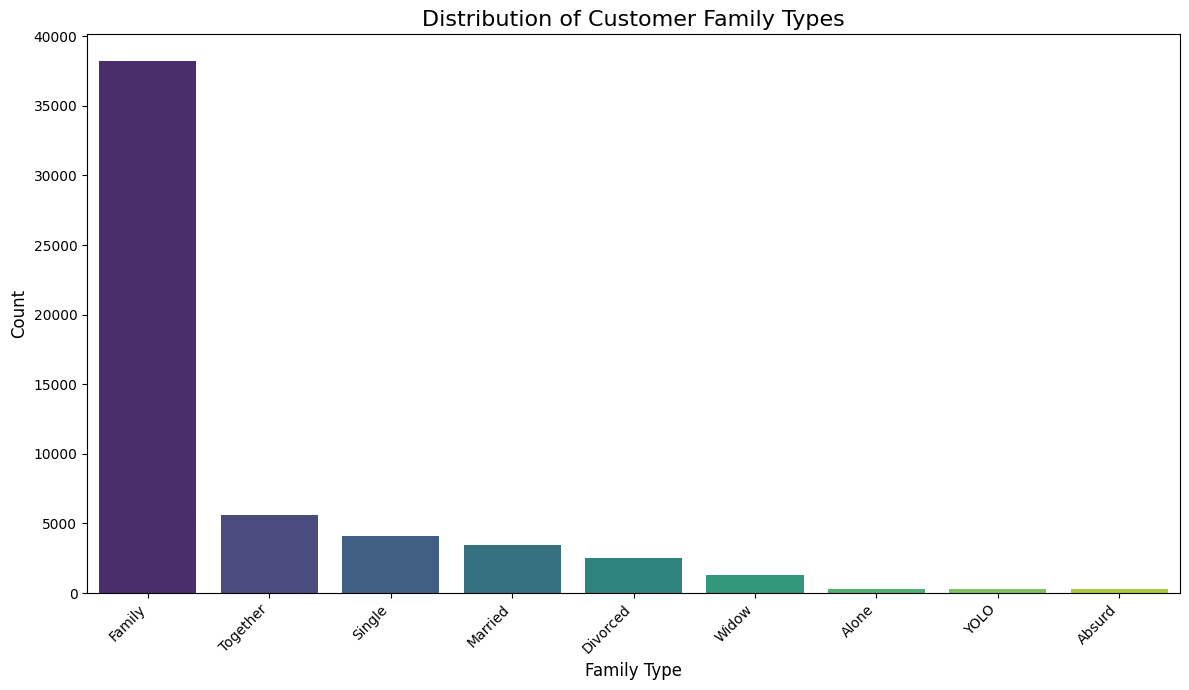

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for Family Type distribution
plt.figure(figsize=(12, 7))
sns.barplot(x='Family Type', y='Count', data=family_type_counts, palette='viridis', hue='Family Type', legend=False)
plt.title('Distribution of Customer Family Types', fontsize=16)
plt.xlabel('Family Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

**Analyze Average Spending by Family Type**



In [ ]:
import sqlite3
import pandas as pd
from tabulate import tabulate

# Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# SQL query to select the Children, Marital_Status, and Total_spends columns
sql_query = "SELECT Children, Marital_Status, Total_spends FROM marketing_data"

# Execute the query and load the results into a pandas DataFrame
df_family_spending = pd.read_sql_query(sql_query, conn)

# Create the 'Family_Type' column based on the specified logic
df_family_spending['Family_Type'] = df_family_spending.apply(lambda row: 'Family' if row['Children'] > 0 else row['Marital_Status'], axis=1)

# Calculate the average Total_spends for each Family_Type
average_spends_by_family = df_family_spending.groupby('Family_Type')['Total_spends'].mean().reset_index()

# Sort by average spends in descending order to easily see highest spenders
average_spends_by_family = average_spends_by_family.sort_values(by='Total_spends', ascending=False)

# Close the database connection
conn.close()

print('Average Total Spends by Family Type:')
print(tabulate(average_spends_by_family, headers='keys', tablefmt='grid'))

Average Total Spends by Family Type:
+----+---------------+----------------+
|    | Family_Type   |   Total_spends |
+====+===============+================+
|  7 | Widow         |        973.038 |
+----+---------------+----------------+
|  2 | Divorced      |        972.739 |
+----+---------------+----------------+
|  1 | Alone         |        969.625 |
+----+---------------+----------------+
|  5 | Single        |        954.747 |
+----+---------------+----------------+
|  6 | Together      |        948.723 |
+----+---------------+----------------+
|  8 | YOLO          |        900.368 |
+----+---------------+----------------+
|  4 | Married       |        892.628 |
+----+---------------+----------------+
|  0 | Absurd        |        859.166 |
+----+---------------+----------------+
|  3 | Family        |        499.697 |
+----+---------------+----------------+


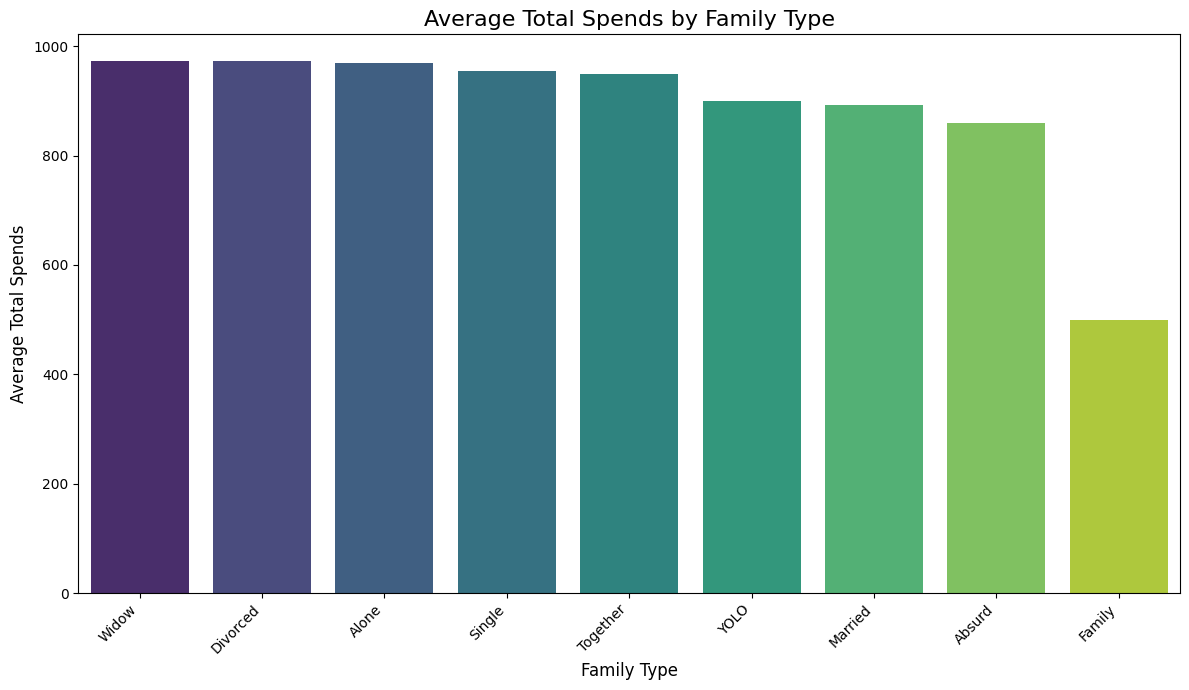

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x='Family_Type', y='Total_spends', data=average_spends_by_family, palette='viridis', hue='Family_Type', legend=False, order=average_spends_by_family['Family_Type'])
plt.title('Average Total Spends by Family Type', fontsize=16)
plt.xlabel('Family Type', fontsize=12)
plt.ylabel('Average Total Spends', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import sqlite3
import pandas as pd
from tabulate import tabulate

# Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# SQL query to select Num_Webvisits and NumWebPurchases columns
sql_query = "SELECT Num_Webvisits, NumWebPurchases FROM marketing_data"

# Execute the query and load the results into a pandas DataFrame
web_activity_df = pd.read_sql_query(sql_query, conn)

# Calculate the sum of each column
total_web_activity = web_activity_df[['Num_Webvisits', 'NumWebPurchases']].sum()

# Convert the Series to a DataFrame for easier sorting and display
total_web_activity_df = total_web_activity.reset_index()
total_web_activity_df.columns = ['Activity Type', 'Total Count']

# Sort by 'Total Count' in descending order
total_web_activity_df = total_web_activity_df.sort_values(by='Total Count', ascending=False)

# Close the database connection
conn.close()

print('Total Counts for Web Visits and Web Purchases:')
print(tabulate(total_web_activity_df, headers='keys', tablefmt='grid'))

Total Counts for Web Visits and Web Purchases:
+----+-----------------+---------------+
|    | Activity Type   |   Total Count |
+====+=================+===============+
|  0 | Num_Webvisits   |        289526 |
+----+-----------------+---------------+
|  1 | NumWebPurchases |        237938 |
+----+-----------------+---------------+


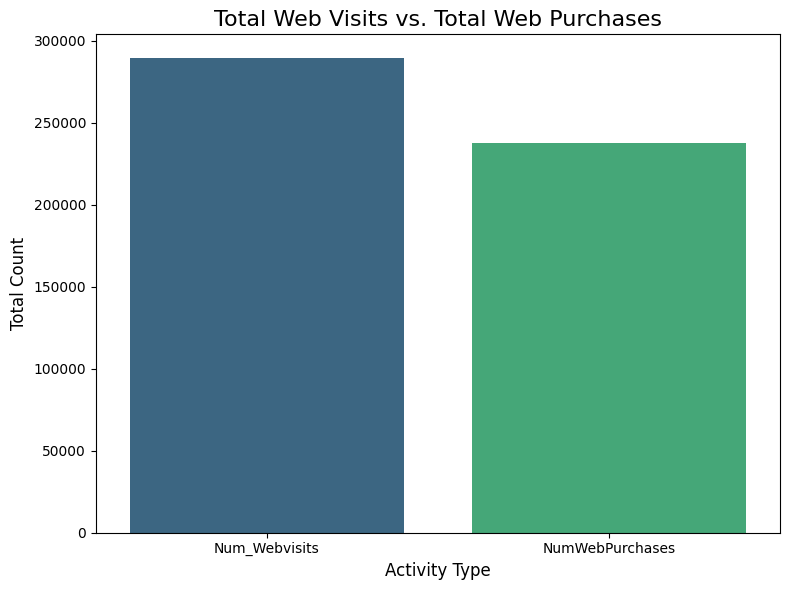

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Activity Type', y='Total Count', data=total_web_activity_df, palette='viridis', hue='Activity Type', legend=False, order=total_web_activity_df['Activity Type'])
plt.title('Total Web Visits vs. Total Web Purchases', fontsize=16)
plt.xlabel('Activity Type', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=0) # Keep labels horizontal as there are only two
plt.tight_layout()
plt.show()

**Web Activity Vs Purchase**

In [ ]:
import sqlite3
import pandas as pd
from tabulate import tabulate

# Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# SQL query to select ID, Num_Webvisits, and NumWebPurchases columns and sort them
sql_query = """SELECT ID, Num_Webvisits, NumWebPurchases
             FROM marketing_data
             ORDER BY Num_Webvisits DESC, NumWebPurchases DESC"""

# Execute the query and load the results into a pandas DataFrame
sorted_web_activity_df = pd.read_sql_query(sql_query, conn)

# Close the database connection
conn.close()

print('Customer Web Activity sorted by Web Visits and Web Purchases (descending):')
print(tabulate(sorted_web_activity_df.head(50), headers='keys', tablefmt='grid'))

Customer Web Activity sorted by Web Visits and Web Purchases (descending):
+----+------------------+-----------------+-------------------+
|    |               ID |   Num_Webvisits |   NumWebPurchases |
+====+==================+=================+===================+
|  0 |      3.58594e+06 |              10 |                13 |
+----+------------------+-----------------+-------------------+
|  1 |      1.39106e+07 |              10 |                11 |
+----+------------------+-----------------+-------------------+
|  2 |      1.59231e+06 |              10 |                 9 |
+----+------------------+-----------------+-------------------+
|  3 |      1.35602e+07 |              10 |                 9 |
+----+------------------+-----------------+-------------------+
|  4 |      9.96648e+06 |              10 |                 9 |
+----+------------------+-----------------+-------------------+
|  5 |      1.22358e+07 |              10 |                 8 |
+----+------------------+----

In [ ]:
import sqlite3
import pandas as pd

# Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# Construct the SQL query to select the specified columns
sql_query = "SELECT ID, Age_Segment, Web_Engagement, Customer_Type FROM marketing_data"

# Execute the query and load the results into a pandas DataFrame
customer_demographics_df = pd.read_sql_query(sql_query, conn)

# Close the database connection
conn.close()

print('Customer demographics data retrieved successfully.')
display(customer_demographics_df.head())

Customer demographics data retrieved successfully.


ID   Age_Segment Web_Engagement    Customer_Type
0    342199  Old Customer            low  Family Customer
1   8075450  Old Customer            low  Family Customer
2  13664263  Old Customer            low            Other
3  16164787  Old Customer            low  Family Customer
4  15815139  Old Customer   intermediate  Family Customer

In [ ]:
merged_df = pd.merge(sorted_web_activity_df, customer_demographics_df, on='ID', how='inner')

print('Merged DataFrame with web activity and demographic data:')
display(merged_df.head())

Merged DataFrame with web activity and demographic data:


ID  Num_Webvisits  NumWebPurchases   Age_Segment Web_Engagement  \
0   3585941             10               13  Old Customer   intermediate   
1  13910605             10               11  Old Customer   intermediate   
2   1592310             10                9  Old Customer   intermediate   
3  13560184             10                9  Old Customer   intermediate   
4   9966485             10                9  Old Customer   intermediate   

     Customer_Type  
0            Other  
1  Family Customer  
2  Family Customer  
3            Other  
4            Other

In [ ]:
from tabulate import tabulate

print('Top 50 rows of Merged DataFrame with web activity and demographic data:')
print(tabulate(merged_df.head(50), headers='keys', tablefmt='grid'))

Top 50 rows of Merged DataFrame with web activity and demographic data:
+----+----------+-----------------+-------------------+----------------+------------------+-----------------+
|    |       ID |   Num_Webvisits |   NumWebPurchases | Age_Segment    | Web_Engagement   | Customer_Type   |
+====+==========+=================+===================+================+==================+=================+
|  0 |  3585941 |              10 |                13 | Old Customer   | intermediate     | Other           |
+----+----------+-----------------+-------------------+----------------+------------------+-----------------+
|  1 | 13910605 |              10 |                11 | Old Customer   | intermediate     | Family Customer |
+----+----------+-----------------+-------------------+----------------+------------------+-----------------+
|  2 |  1592310 |              10 |                 9 | Old Customer   | intermediate     | Family Customer |
+----+----------+-----------------+-------------

**Visualize Web Activity Distributions by Age Segment**



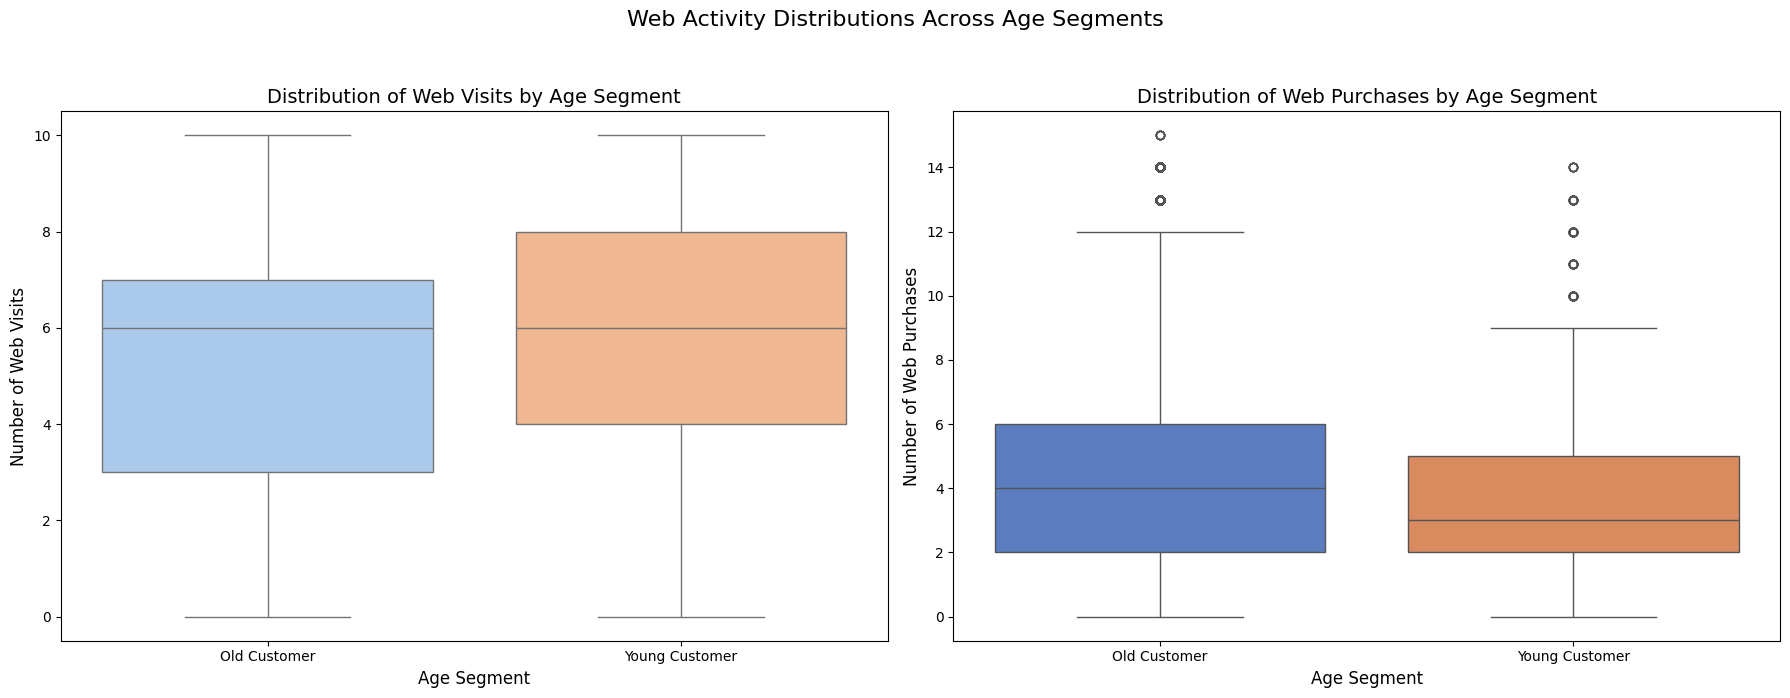

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure and axes for two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Box plot for Num_Webvisits by Age_Segment
sns.boxplot(x='Age_Segment', y='Num_Webvisits', data=merged_df, palette='pastel', ax=axes[0], hue='Age_Segment', legend=False)
axes[0].set_title('Distribution of Web Visits by Age Segment', fontsize=14)
axes[0].set_xlabel('Age Segment', fontsize=12)
axes[0].set_ylabel('Number of Web Visits', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)

# Box plot for NumWebPurchases by Age_Segment
sns.boxplot(x='Age_Segment', y='NumWebPurchases', data=merged_df, palette='muted', ax=axes[1], hue='Age_Segment', legend=False)
axes[1].set_title('Distribution of Web Purchases by Age Segment', fontsize=14)
axes[1].set_xlabel('Age Segment', fontsize=12)
axes[1].set_ylabel('Number of Web Purchases', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)

plt.suptitle('Web Activity Distributions Across Age Segments', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

**Distribution of Income Segments**

Subtask:
Visualize the distribution of customers across different income segments using a bar plot.


**Reasoning**:
To visualize the distribution of income segments, I need to first retrieve the `Income_Segment` column from the `marketing_data` table in the `marketing_campaign.db` database. Then I will count the occurrences of each segment to prepare the data for plotting.



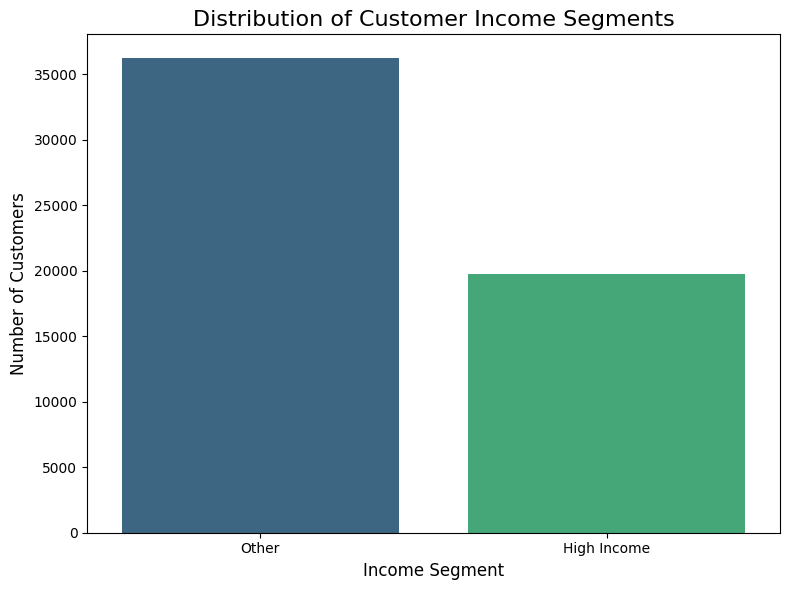

Income segment distribution calculated and plotted successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# SQL query to select the Income_Segment column
sql_query = "SELECT Income_Segment FROM marketing_data"

# Execute the query and load the results into a pandas DataFrame
income_segments_df = pd.read_sql_query(sql_query, conn)

# Count the occurrences of each unique Income_Segment
income_segment_counts = income_segments_df['Income_Segment'].value_counts().reset_index()
income_segment_counts.columns = ['Income Segment', 'Count']

# Close the database connection
conn.close()

# Create a bar plot for Income Segment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='Income Segment', y='Count', data=income_segment_counts, palette='viridis', hue='Income Segment', legend=False)
plt.title('Distribution of Customer Income Segments', fontsize=16)
plt.xlabel('Income Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print('Income segment distribution calculated and plotted successfully.')

**Distribution of Age Segments**

**Subtask:**
Visualize the distribution of customers across different age segments using a bar plot.


**Reasoning**:
To visualize the distribution of age segments, I need to retrieve the 'Age_Segment' column from the 'marketing_data' table in the 'marketing_campaign.db' database, count the occurrences of each segment, and then plot the results using a bar chart.



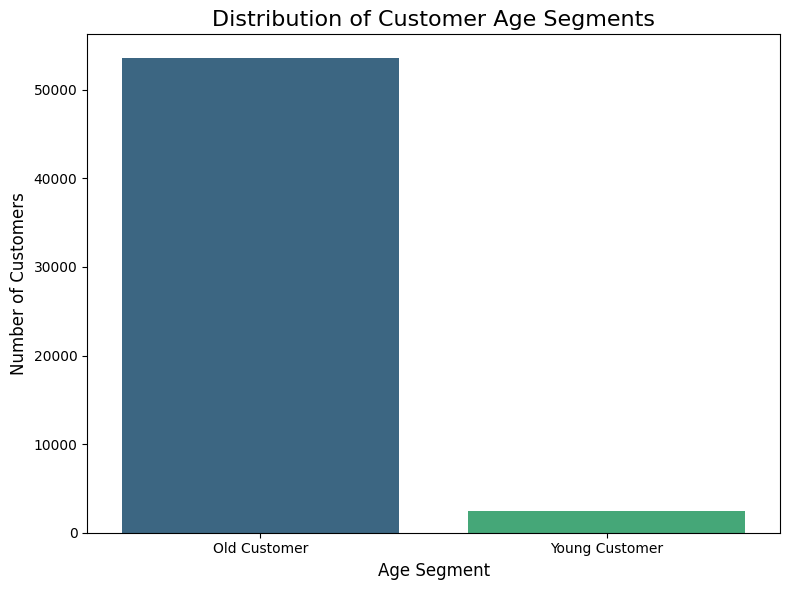

Age segment distribution calculated and plotted successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# SQL query to select the Age_Segment column
sql_query = "SELECT Age_Segment FROM marketing_data"

age_segments_df = pd.read_sql_query(sql_query, conn)

# Count the occurrences of each unique Age_Segment
age_segment_counts = age_segments_df['Age_Segment'].value_counts().reset_index()
age_segment_counts.columns = ['Age Segment', 'Count']

# Close the database connection
conn.close()

# Create a bar plot for Age Segment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='Age Segment', y='Count', data=age_segment_counts, palette='viridis', hue='Age Segment', legend=False)
plt.title('Distribution of Customer Age Segments', fontsize=16)
plt.xlabel('Age Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print('Age segment distribution calculated and plotted successfully.')

**Distribution of Spending Types**

**Subtask:**
Visualize the distribution of customer spending types using a bar plot.


**Reasoning**:
To visualize the distribution of spending types, I need to retrieve the 'Spending_Type' column from the 'marketing_data' table in the 'marketing_campaign.db' database, count the occurrences of each type, and then plot the results using a bar chart, as instructed.



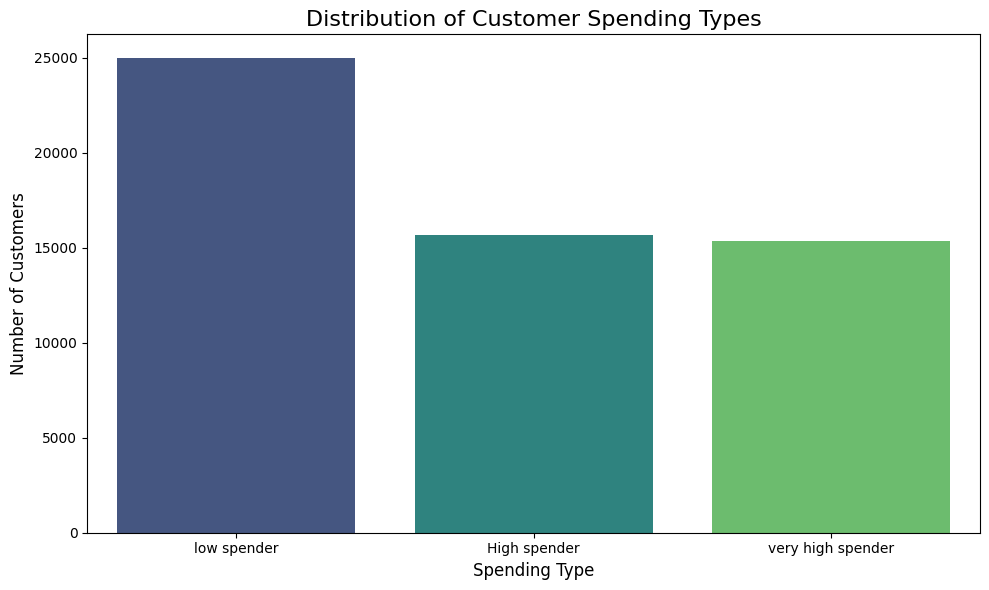

Spending type distribution calculated and plotted successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# SQL query to select the Spending_Type column
sql_query = "SELECT Spending_Type FROM marketing_data"

# Execute the query and load the results into a pandas DataFrame
spending_types_df = pd.read_sql_query(sql_query, conn)

# Count the occurrences of each unique Spending_Type
spending_type_counts = spending_types_df['Spending_Type'].value_counts().reset_index()
spending_type_counts.columns = ['Spending Type', 'Count']

# Close the database connection
conn.close()

# Create a bar plot for Spending Type distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Spending Type', y='Count', data=spending_type_counts, palette='viridis', hue='Spending Type', legend=False)
plt.title('Distribution of Customer Spending Types', fontsize=16)
plt.xlabel('Spending Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print('Spending type distribution calculated and plotted successfully.')

**Distribution of Web Engagement**

**Subtask:**
Visualize the distribution of customer web engagement levels using a bar plot.


**Reasoning**:
To visualize the distribution of web engagement levels, I will follow the instructions to connect to the database, query the 'Web_Engagement' column, count its unique values, and then plot the results as a bar chart.



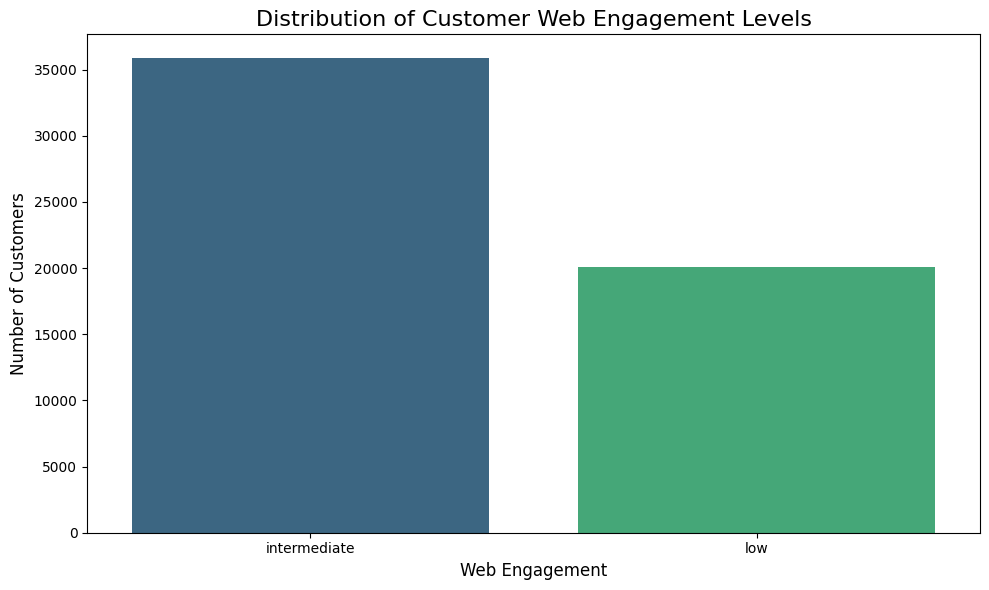

Web engagement distribution calculated and plotted successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# SQL query to select the Web_Engagement column
sql_query = "SELECT Web_Engagement FROM marketing_data"

# Execute the query and load the results into a pandas DataFrame
web_engagement_df = pd.read_sql_query(sql_query, conn)

# Count the occurrences of each unique Web_Engagement level
web_engagement_counts = web_engagement_df['Web_Engagement'].value_counts().reset_index()
web_engagement_counts.columns = ['Web Engagement', 'Count']

# Close the database connection
conn.close()

# Create a bar plot for Web Engagement distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Web Engagement', y='Count', data=web_engagement_counts, palette='viridis', hue='Web Engagement', legend=False)
plt.title('Distribution of Customer Web Engagement Levels', fontsize=16)
plt.xlabel('Web Engagement', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print('Web engagement distribution calculated and plotted successfully.')

**Distribution of Education Levels**

**Subtask:**
Visualize the distribution of customers across different education levels using a bar plot.


**Reasoning**:
To visualize the distribution of education levels, I will connect to the database, query the 'Education' column, count its unique values, and then plot the results as a bar chart as instructed.

**Reasoning**:
As outlined in the reasoning, I will now write the Python code to retrieve the 'Education' column data from the database, count the occurrences of each education level, and then generate a bar plot to visualize their distribution.



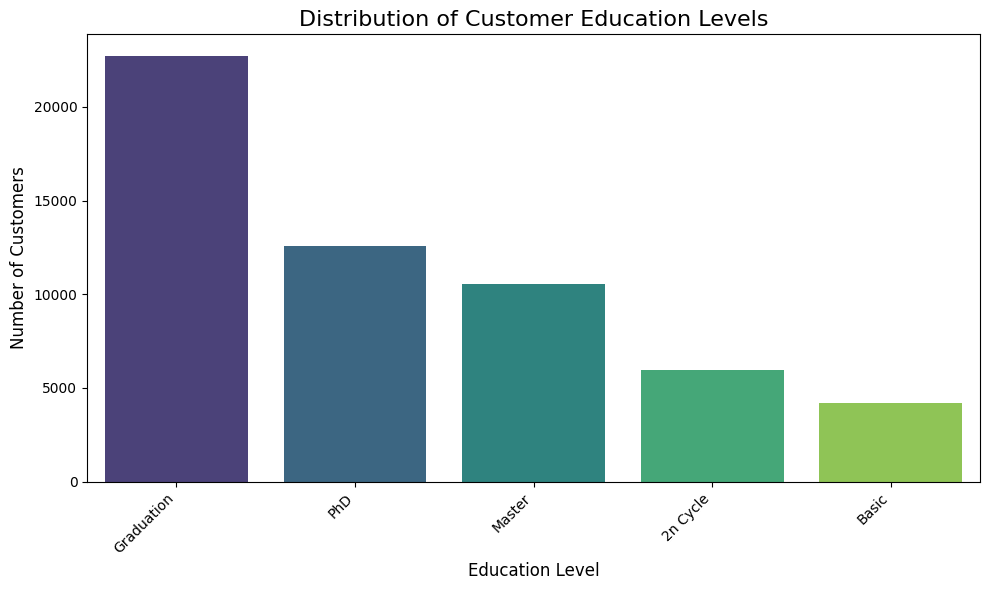

Education level distribution calculated and plotted successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the Education column
sql_query = "SELECT Education FROM marketing_data"

# 3. Execute the query and load the results into a pandas DataFrame
education_levels_df = pd.read_sql_query(sql_query, conn)

# 4. Count the occurrences of each unique education level
education_level_counts = education_levels_df['Education'].value_counts().reset_index()
education_level_counts.columns = ['Education Level', 'Count']

# 5. Close the database connection
conn.close()

# 6. Create a bar plot using seaborn.barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Count', data=education_level_counts, palette='viridis', hue='Education Level', legend=False)
# 7. Set the title of the plot
plt.title('Distribution of Customer Education Levels', fontsize=16)
# 8. Label the x-axis and y-axis
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
# 9. Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')
# 10. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

print('Education level distribution calculated and plotted successfully.')

**Distribution of Marital Status**

**Subtask:**
Visualize the distribution of customers across different marital statuses using a bar plot.


**Reasoning**:
To visualize the distribution of marital statuses, I will connect to the database, query the 'Marital_Status' column, count its unique values, and then plot the results as a bar chart as instructed.



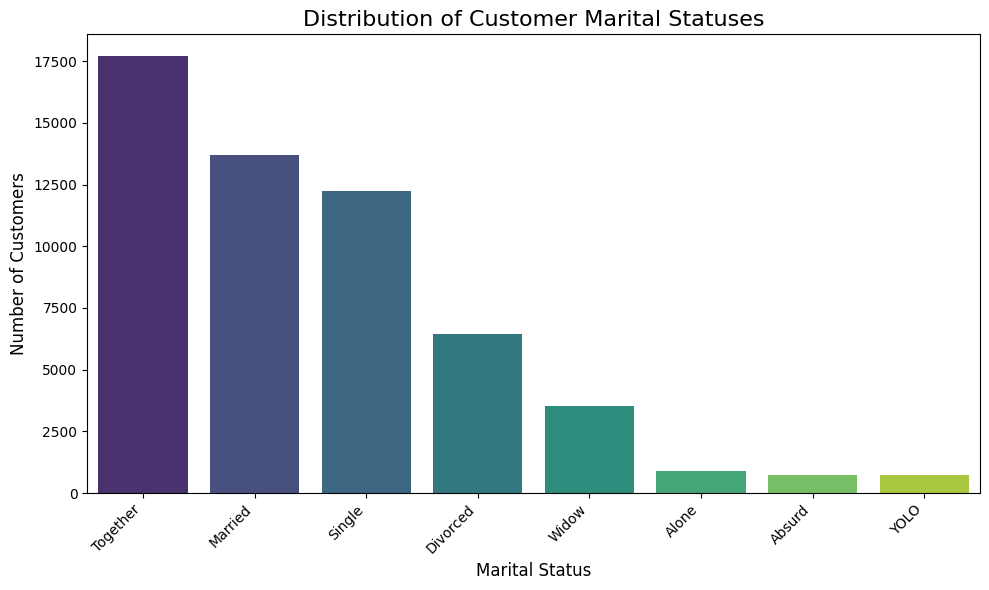

Marital status distribution calculated and plotted successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the 'Marital_Status' column
sql_query = "SELECT Marital_Status FROM marketing_data"

# 3. Execute the query and load the results into a pandas DataFrame
marital_status_df = pd.read_sql_query(sql_query, conn);

# 4. Count the occurrences of each unique marital status
marital_status_counts = marital_status_df['Marital_Status'].value_counts().reset_index()
marital_status_counts.columns = ['Marital Status', 'Count']

# 5. Close the database connection
conn.close()

# 6. Create a bar plot using seaborn.barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital Status', y='Count', data=marital_status_counts, palette='viridis', hue='Marital Status', legend=False)
# 7. Set the title of the plot
plt.title('Distribution of Customer Marital Statuses', fontsize=16)
# 8. Label the x-axis and y-axis
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
# 9. Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')
# 10. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

# 11. Print a success message
print('Marital status distribution calculated and plotted successfully.')

**Campaign Response Rate by Education Level**

**Subtask:**
Visualize the campaign response rate (from 'Response' or 'Campaign_Responder' column) grouped by education level using a bar plot.


**Reasoning**:
To visualize the campaign response rate by education level, I will query the necessary columns from the database, calculate the response rate for each education level, and then generate a bar plot as instructed.



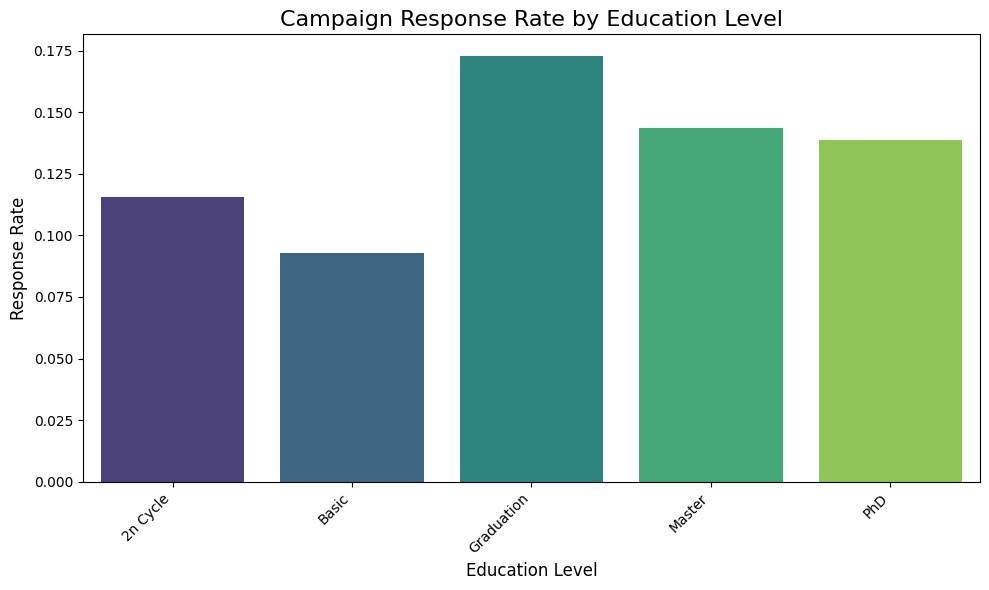

Campaign response rate by education level calculated and plotted successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the 'Education' and 'Response' columns
sql_query = "SELECT Education, Response FROM marketing_data"

# 3. Execute the query and load the results into a pandas DataFrame
response_by_education_df = pd.read_sql_query(sql_query, conn)

# 4. Calculate the mean of the 'Response' column, grouped by 'Education'
response_rate_by_education = response_by_education_df.groupby('Education')['Response'].mean()

# 5. Reset the index of the resulting DataFrame and rename the columns appropriately
response_rate_by_education = response_rate_by_education.reset_index()
response_rate_by_education.columns = ['Education Level', 'Response Rate']

# 6. Close the database connection
conn.close()

# 7. Create a bar plot using seaborn.barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Response Rate', data=response_rate_by_education, palette='viridis', hue='Education Level', legend=False)
# 8. Set the title of the plot
plt.title('Campaign Response Rate by Education Level', fontsize=16)
# 9. Label the x-axis and y-axis
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Response Rate', fontsize=12)
# 10. Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')
# 11. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

print('Campaign response rate by education level calculated and plotted successfully.')

**Total Spends by Education Level**

**Subtask:**
Visualize the average total spends grouped by education level using a bar plot.


**Reasoning**:
To visualize the average total spends by education level, I will query the 'Education' and 'Total_spends' columns from the database, calculate the mean 'Total_spends' for each education level, and then generate a bar plot as instructed.



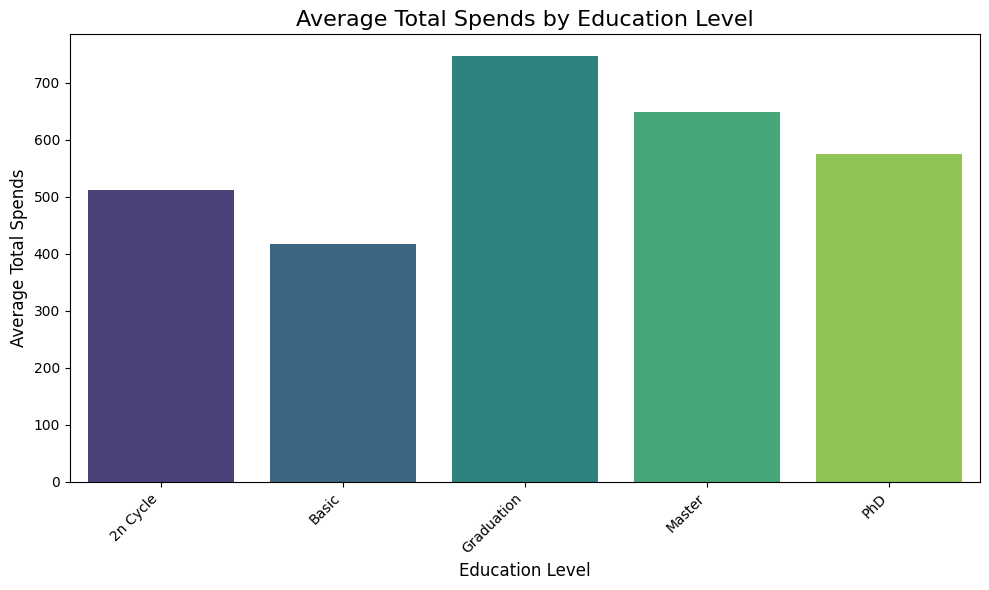

Average total spends by education level calculated and plotted successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the 'Education' and 'Total_spends' columns
sql_query = "SELECT Education, Total_spends FROM marketing_data"

# 3. Execute the query and load the results into a pandas DataFrame
total_spends_by_education_df = pd.read_sql_query(sql_query, conn)

# 4. Calculate the average of 'Total_spends' for each unique 'Education' level
average_spends_by_education = total_spends_by_education_df.groupby('Education')['Total_spends'].mean()

# 5. Reset the index of the resulting DataFrame and rename the columns appropriately
average_spends_by_education = average_spends_by_education.reset_index()
average_spends_by_education.columns = ['Education Level', 'Average Total Spends']

# 6. Close the database connection
conn.close()

# 7. Create a bar plot using seaborn.barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Average Total Spends', data=average_spends_by_education, palette='viridis', hue='Education Level', legend=False)
# 8. Set the title of the plot
plt.title('Average Total Spends by Education Level', fontsize=16)
# 9. Label the x-axis and y-axis
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Total Spends', fontsize=12)
# 10. Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')
# 11. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

# 12. Print a success message
print('Average total spends by education level calculated and plotted successfully.')

**Total Spends by Marital Status**

**Subtask:**
Visualize the average total spends grouped by marital status using a bar plot.


**Reasoning**:
To visualize the average total spends by marital status, I will query the 'Marital_Status' and 'Total_spends' columns from the database, calculate the mean 'Total_spends' for each marital status, and then generate a bar plot as instructed.

**Reasoning**:
Now I will generate the Python code to retrieve the marital status and total spends data from the database, calculate the average spends per marital status, and then visualize these averages using a bar plot, as per the instructions.



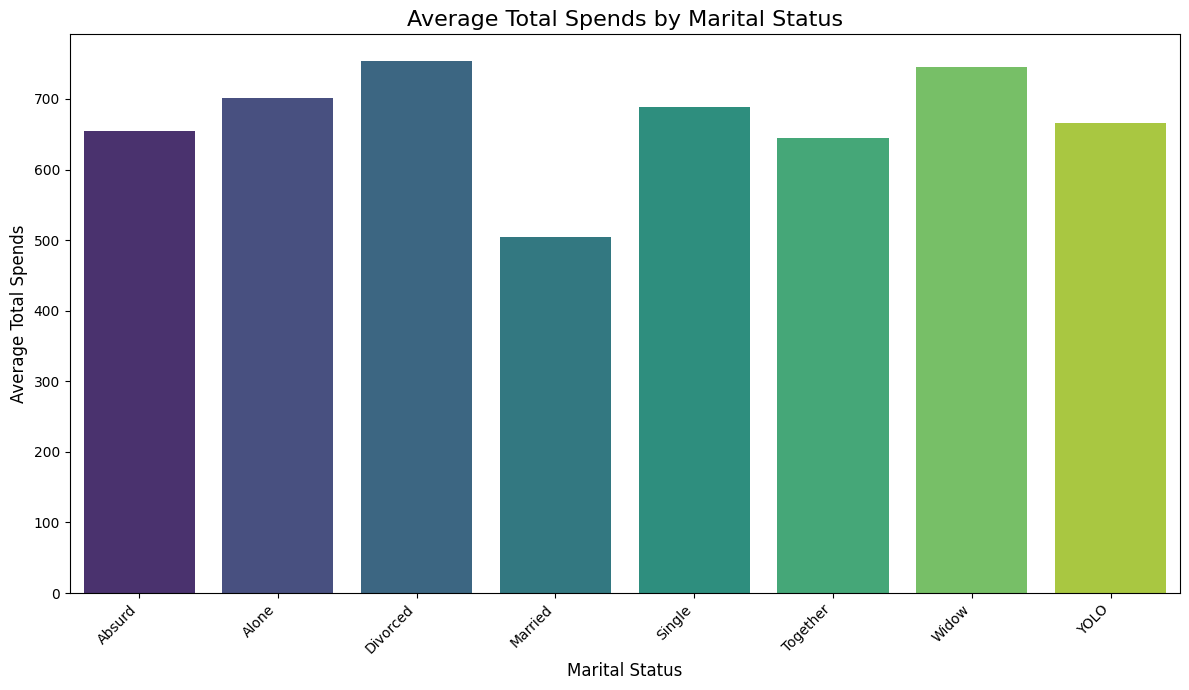

Average total spends by marital status calculated and plotted successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the 'Marital_Status' and 'Total_spends' columns
sql_query = "SELECT Marital_Status, Total_spends FROM marketing_data"

# 3. Execute the query and load the results into a pandas DataFrame
total_spends_by_marital_status_df = pd.read_sql_query(sql_query, conn)

# 4. Calculate the average of 'Total_spends' for each unique 'Marital_Status' level
average_spends_by_marital_status = total_spends_by_marital_status_df.groupby('Marital_Status')['Total_spends'].mean()

# 5. Reset the index of the resulting DataFrame and rename the columns appropriately
average_spends_by_marital_status = average_spends_by_marital_status.reset_index()
average_spends_by_marital_status.columns = ['Marital Status', 'Average Total Spends']

# 6. Close the database connection
conn.close()

# 7. Create a bar plot using seaborn.barplot
plt.figure(figsize=(12, 7))
sns.barplot(x='Marital Status', y='Average Total Spends', data=average_spends_by_marital_status, palette='viridis', hue='Marital Status', legend=False)
# 8. Set the title of the plot
plt.title('Average Total Spends by Marital Status', fontsize=16)
# 9. Label the x-axis and y-axis
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Average Total Spends', fontsize=12)
# 10. Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')
# 11. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

# 12. Print a confirmation message
print('Average total spends by marital status calculated and plotted successfully.')

**Relationship between Age and Total Spends**

**Subtask:**
Create a scatter plot to visualize the relationship between customer age and total spending, possibly with a regression line.


**Reasoning**:
To visualize the relationship between customer age and total spending, I will query the 'Age' and 'Total_spends' columns from the database, load them into a DataFrame, and then create a scatter plot with a regression line using seaborn as instructed.



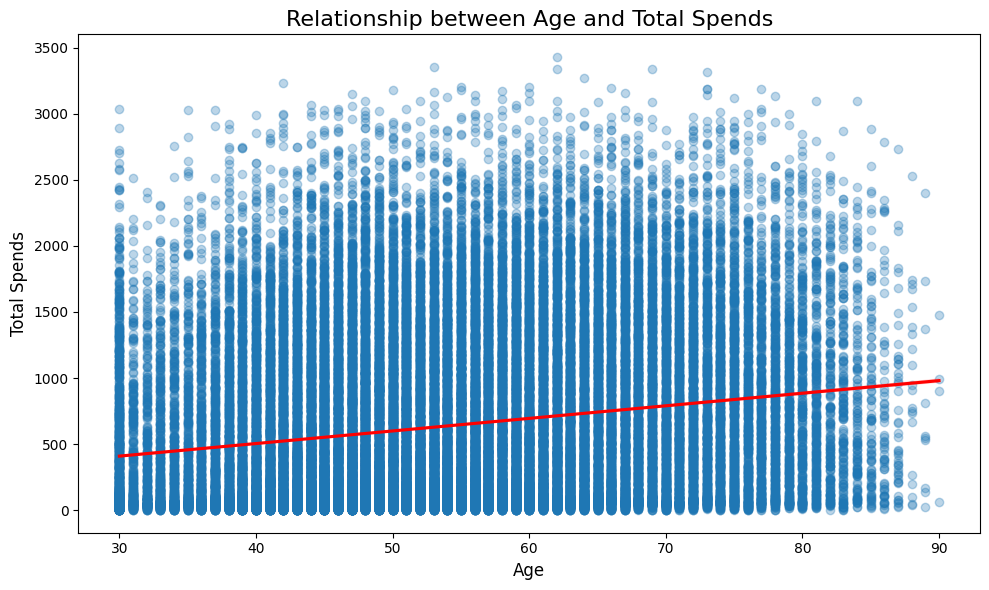

Scatter plot showing the relationship between Age and Total Spends generated successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the 'Age' and 'Total_spends' columns
sql_query = "SELECT Age, Total_spends FROM marketing_data"

# 3. Execute the query and load the results into a pandas DataFrame
age_spends_df = pd.read_sql_query(sql_query, conn)

# 4. Close the database connection
conn.close()

# 5. Create a scatter plot using seaborn.regplot with Age on the x-axis and Total_spends on the y-axis
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Total_spends', data=age_spends_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

# 6. Set the title of the plot
plt.title('Relationship between Age and Total Spends', fontsize=16)

# 7. Label the x-axis and y-axis
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Spends', fontsize=12)

# 8. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

print('Scatter plot showing the relationship between Age and Total Spends generated successfully.')

**Relationship between Income and Total Spends**

**Subtask:**
Create a scatter plot to visualize the relationship between customer income and total spending, possibly with a regression line.


**Reasoning**:
To visualize the relationship between customer income and total spending, I will query the 'Income' and 'Total_spends' columns from the database, load them into a DataFrame, and then create a scatter plot with a regression line using seaborn as instructed.



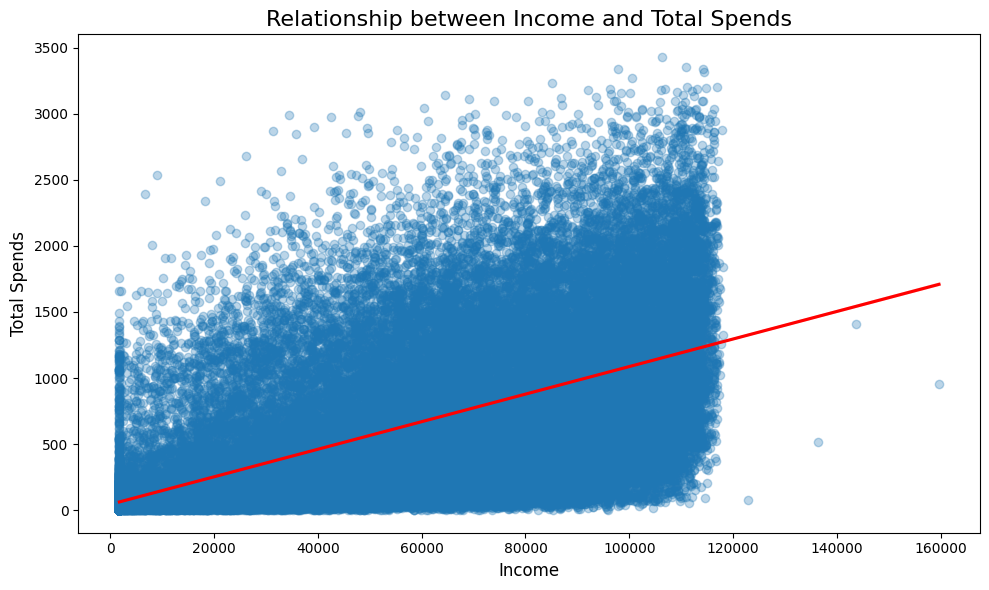

Scatter plot showing the relationship between Income and Total Spends generated successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the 'Income' and 'Total_spends' columns
sql_query = "SELECT Income, Total_spends FROM marketing_data"

# 3. Execute the query and load the results into a pandas DataFrame
income_spends_df = pd.read_sql_query(sql_query, conn)

# 4. Close the database connection
conn.close()

# 5. Create a scatter plot using seaborn.regplot with Income on the x-axis and Total_spends on the y-axis
plt.figure(figsize=(10, 6))
sns.regplot(x='Income', y='Total_spends', data=income_spends_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

# 6. Set the title of the plot
plt.title('Relationship between Income and Total Spends', fontsize=16)

# 7. Label the x-axis and y-axis
plt.xlabel('Income', fontsize=12)
plt.ylabel('Total Spends', fontsize=12)

# 8. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

# 9. Print a confirmation message
print('Scatter plot showing the relationship between Income and Total Spends generated successfully.')

**Distribution of Customers by Country**

**Subtask:**
Visualize the distribution of customers across different countries using a bar plot.


**Reasoning**:
To visualize the distribution of customers by country, I will connect to the database, query the 'Country' column, count its unique values, and then plot the results as a bar chart as instructed.


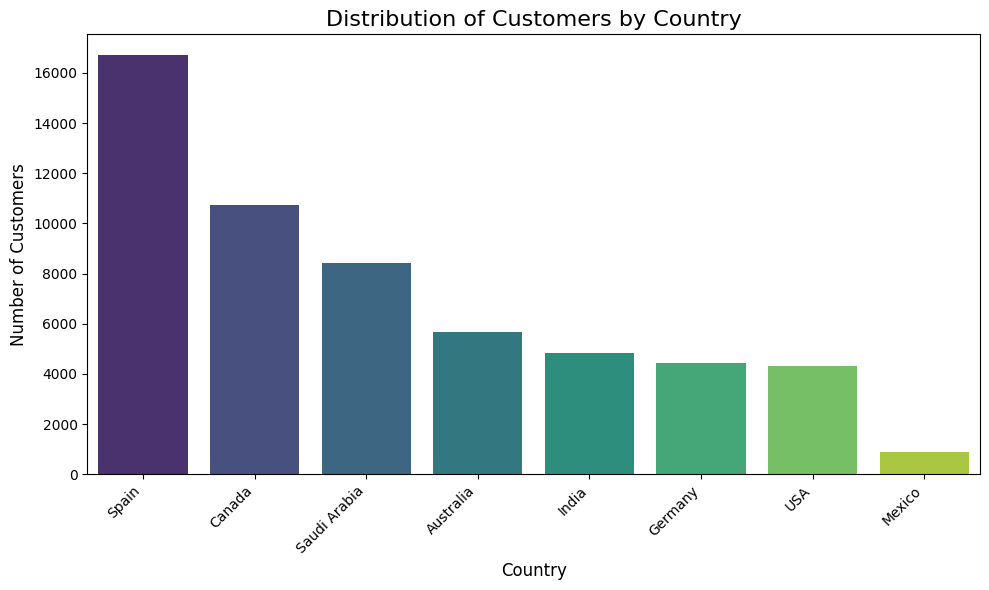

Customer distribution by country calculated and plotted successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the 'Country' column
sql_query = "SELECT Country FROM marketing_data"

# 3. Execute the query and load the results into a pandas DataFrame
country_distribution_df = pd.read_sql_query(sql_query, conn);

# 4. Count the occurrences of each unique country
country_counts = country_distribution_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# 5. Close the database connection
conn.close()

# 6. Create a bar plot using seaborn.barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Count', data=country_counts, palette='viridis', hue='Country', legend=False)
# 7. Set the title of the plot
plt.title('Distribution of Customers by Country', fontsize=16)
# 8. Label the x-axis and y-axis
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
# 9. Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')
# 10. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

# 11. Print a success message
print('Customer distribution by country calculated and plotted successfully.')

## **EDA Task**

**Compare Total Spends and Income by Education Level**




**Reasoning**:
To visualize the average income by education level, I will query the 'Education' and 'Income' columns from the database, calculate the mean 'Income' for each education level, and then generate a bar plot as instructed.



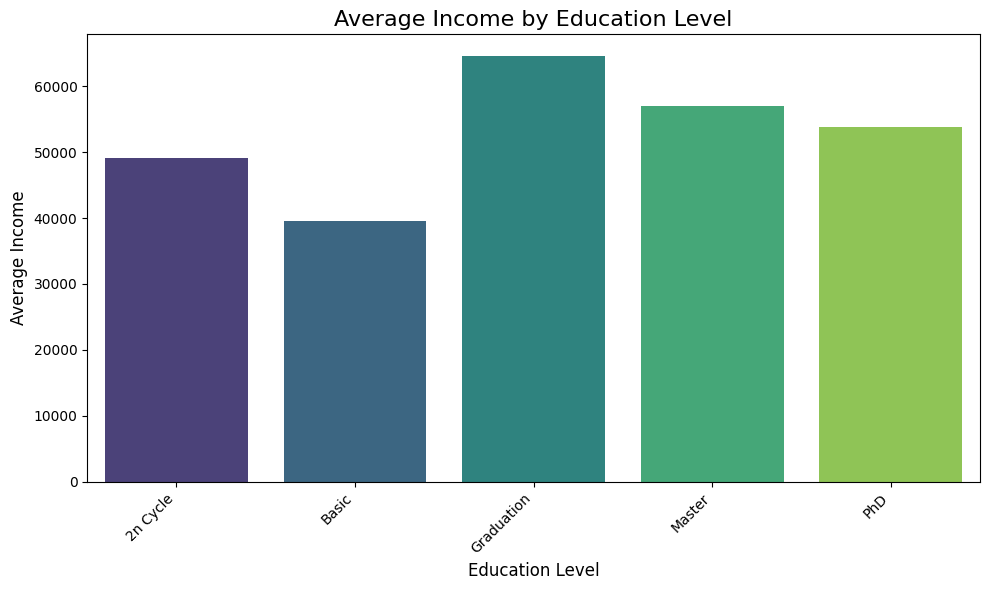

Average income by education level calculated and plotted successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the 'Education' and 'Income' columns
sql_query = "SELECT Education, Income FROM marketing_data"

# 3. Execute the query and load the results into a pandas DataFrame
education_income_df = pd.read_sql_query(sql_query, conn)

# 4. Calculate the average of 'Income' for each unique 'Education' level
average_income_by_education = education_income_df.groupby('Education')['Income'].mean()

# 5. Reset the index of the resulting DataFrame and rename the columns appropriately
average_income_by_education = average_income_by_education.reset_index()
average_income_by_education.columns = ['Education Level', 'Average Income']

# 6. Close the database connection
conn.close()

# 7. Create a bar plot using seaborn.barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Average Income', data=average_income_by_education, palette='viridis', hue='Education Level', legend=False)
# 8. Set the title of the plot
plt.title('Average Income by Education Level', fontsize=16)
# 9. Label the x-axis and y-axis
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Income', fontsize=12)
# 10. Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')
# 11. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

# 12. Print a success message
print('Average income by education level calculated and plotted successfully.')

**Reasoning**:
Now that both average income and average total spends by education level have been calculated, I will merge these two dataframes and then create a grouped bar plot to compare them directly, as per the overall task instructions.



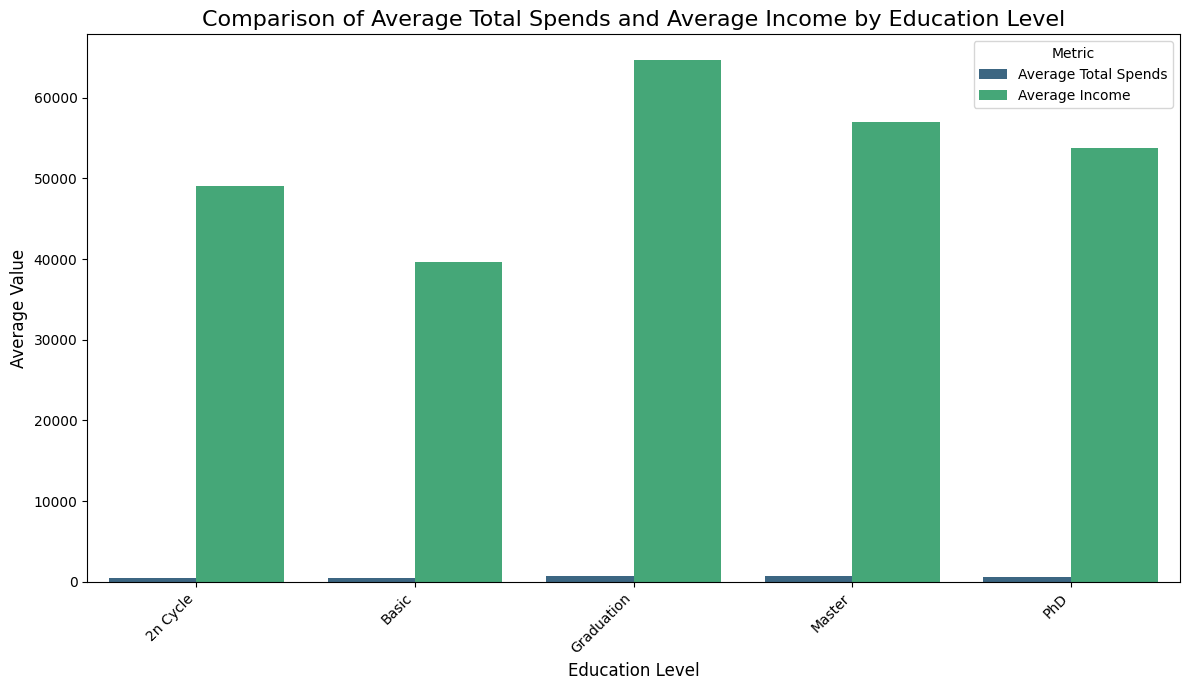

Combined bar plot for Average Total Spends and Average Income by Education Level generated successfully.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the two dataframes on 'Education Level'
combined_education_data = pd.merge(average_spends_by_education, average_income_by_education, on='Education Level')

# Reshape the DataFrame for plotting (long format)
combined_education_data_melted = combined_education_data.melt(id_vars='Education Level', var_name='Metric', value_name='Value')

# Create a grouped bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Education Level', y='Value', hue='Metric', data=combined_education_data_melted, palette='viridis')

# Set the title and labels
plt.title('Comparison of Average Total Spends and Average Income by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

print('Combined bar plot for Average Total Spends and Average Income by Education Level generated successfully.')

**Compare Total Spends and Income by Marital Status**

**Subtask:**
Generate bar plots to compare the average 'Total_spends' and average 'Income' across different 'Marital_Status' categories. Ensure appropriate labels and a legend are included.


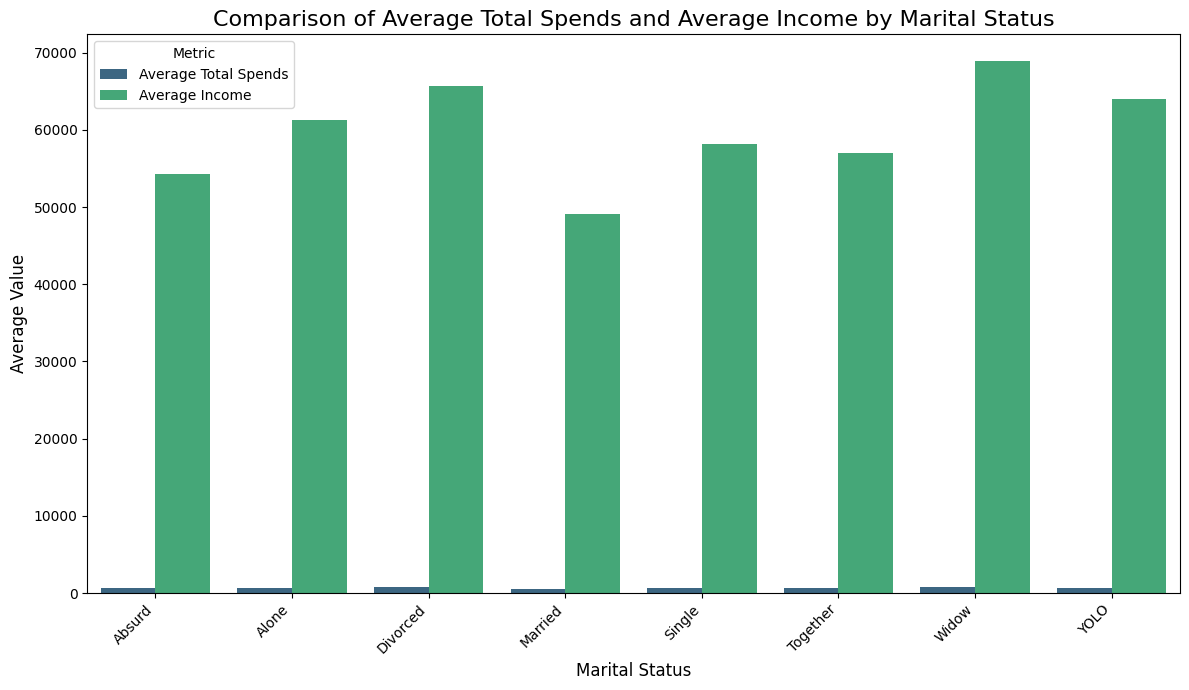

Combined bar plot for Average Total Spends and Average Income by Marital Status generated successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the 'Marital_Status', 'Total_spends', and 'Income' columns
sql_query = "SELECT Marital_Status, Total_spends, Income FROM marketing_data"

# 3. Execute the query and load the results into a pandas DataFrame
marital_data_df = pd.read_sql_query(sql_query, conn)

# 4. Calculate the average of 'Total_spends' for each unique 'Marital_Status' level
average_spends_by_marital_status = marital_data_df.groupby('Marital_Status')['Total_spends'].mean()

# 5. Calculate the average of 'Income' for each unique 'Marital_Status' level
average_income_by_marital_status = marital_data_df.groupby('Marital_Status')['Income'].mean()

# 6. Reset the index for both resulting DataFrames and rename the columns appropriately
average_spends_by_marital_status = average_spends_by_marital_status.reset_index()
average_spends_by_marital_status.columns = ['Marital Status', 'Average Total Spends']

average_income_by_marital_status = average_income_by_marital_status.reset_index()
average_income_by_marital_status.columns = ['Marital Status', 'Average Income']

# 7. Close the database connection
conn.close()

# 8. Merge the two DataFrames (average spends and average income by marital status) on the 'Marital Status' column
combined_marital_data = pd.merge(average_spends_by_marital_status, average_income_by_marital_status, on='Marital Status')

# 9. Reshape the merged DataFrame into a long format suitable for grouped bar plotting
combined_marital_data_melted = combined_marital_data.melt(id_vars='Marital Status', var_name='Metric', value_name='Value')

# 10. Create a grouped bar plot using seaborn.barplot
plt.figure(figsize=(12, 7))
sns.barplot(x='Marital Status', y='Value', hue='Metric', data=combined_marital_data_melted, palette='viridis')

# 11. Set the title of the plot
plt.title('Comparison of Average Total Spends and Average Income by Marital Status', fontsize=16)

# 12. Label the x-axis and y-axis
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Average Value', fontsize=12)

# 13. Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# 14. Add a legend
plt.legend(title='Metric')

# 15. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

# 16. Print a confirmation message
print('Combined bar plot for Average Total Spends and Average Income by Marital Status generated successfully.')

**Compare Total Spends and Income by Age Segment**

**Subtask:**
Create bar plots to visualize the average 'Total_spends' and average 'Income' for different 'Age_Segment' categories. Ensure appropriate labels and a legend are included.


**Reasoning**:
To visualize the comparison of average total spends and average income by age segment, I will query the necessary columns from the database, calculate the averages for each age segment, merge these results, and then generate a grouped bar plot for direct comparison as instructed.



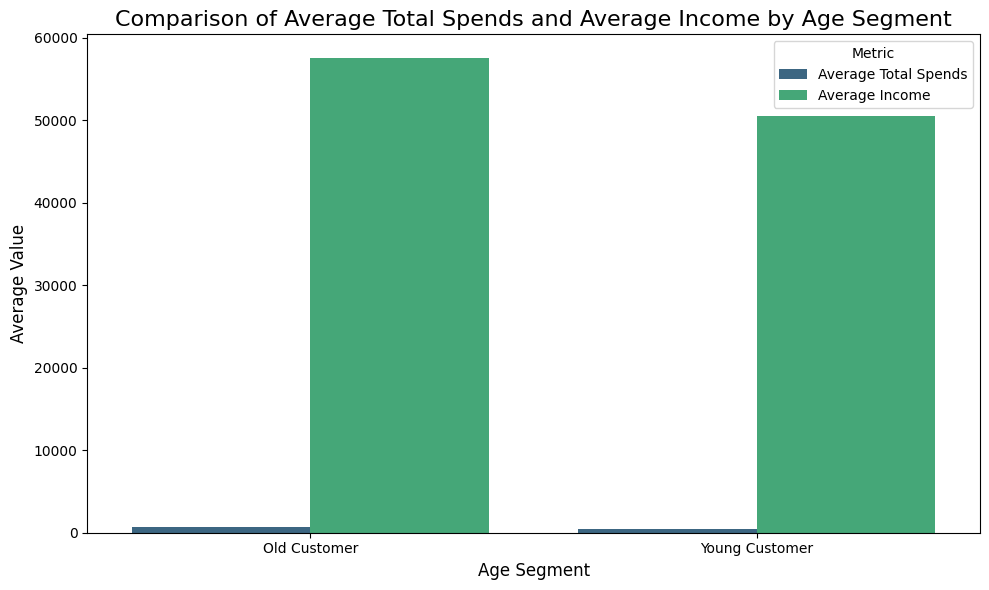

Combined bar plot for Average Total Spends and Average Income by Age Segment generated successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the 'Age_Segment', 'Total_spends', and 'Income' columns
sql_query = "SELECT Age_Segment, Total_spends, Income FROM marketing_data"

# 3. Execute the query and load the results into a pandas DataFrame
age_data_df = pd.read_sql_query(sql_query, conn)

# 4. Calculate the average of 'Total_spends' for each unique 'Age_Segment' level
average_spends_by_age_segment = age_data_df.groupby('Age_Segment')['Total_spends'].mean()

# 5. Calculate the average of 'Income' for each unique 'Age_Segment' level
average_income_by_age_segment = age_data_df.groupby('Age_Segment')['Income'].mean()

# 6. Reset the index for both resulting DataFrames and rename the columns appropriately
average_spends_by_age_segment = average_spends_by_age_segment.reset_index()
average_spends_by_age_segment.columns = ['Age Segment', 'Average Total Spends']

average_income_by_age_segment = average_income_by_age_segment.reset_index()
average_income_by_age_segment.columns = ['Age Segment', 'Average Income']

# 7. Close the database connection
conn.close()

# 8. Merge the two DataFrames (average spends and average income by age segment) on the 'Age Segment' column
combined_age_data = pd.merge(average_spends_by_age_segment, average_income_by_age_segment, on='Age Segment')

# 9. Reshape the merged DataFrame into a long format suitable for grouped bar plotting
combined_age_data_melted = combined_age_data.melt(id_vars='Age Segment', var_name='Metric', value_name='Value')

# 10. Create a grouped bar plot using seaborn.barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Segment', y='Value', hue='Metric', data=combined_age_data_melted, palette='viridis')

# 11. Set the title of the plot
plt.title('Comparison of Average Total Spends and Average Income by Age Segment', fontsize=16)

# 12. Label the x-axis and y-axis
plt.xlabel('Age Segment', fontsize=12)
plt.ylabel('Average Value', fontsize=12)

# 13. Add a legend
plt.legend(title='Metric')

# 14. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

print('Combined bar plot for Average Total Spends and Average Income by Age Segment generated successfully.')

**Compare Total Spends and Income by Customer Type**

**Subtask:**
Generate bar plots to show the average 'Total_spends' and average 'Income' for different 'Customer_Type' categories. Ensure appropriate labels and a legend are included.


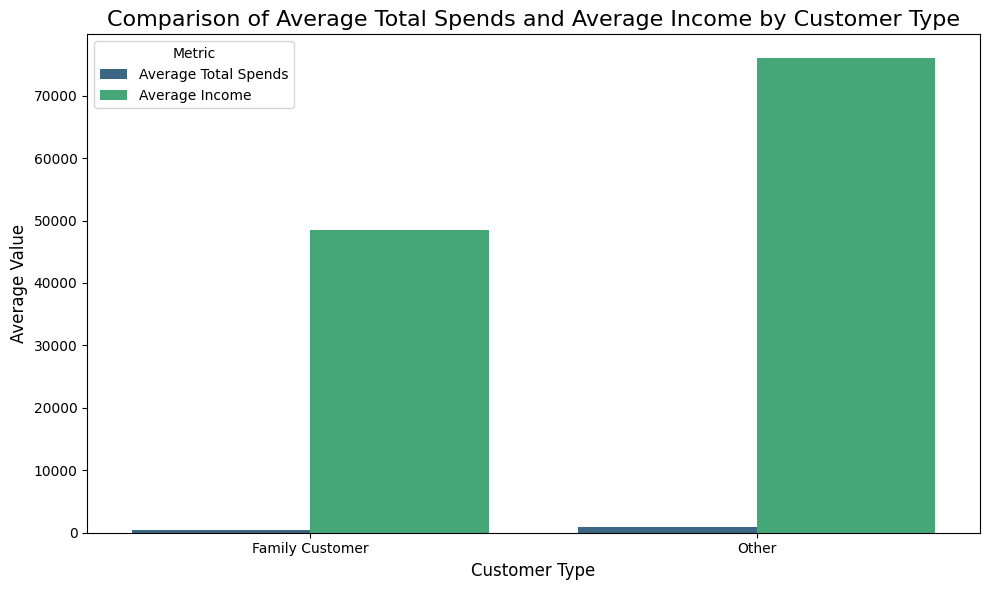

Combined bar plot for Average Total Spends and Average Income by Customer Type generated successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the 'Customer_Type', 'Total_spends', and 'Income' columns
sql_query = "SELECT Customer_Type, Total_spends, Income FROM marketing_data"

# 3. Execute the query and load the results into a pandas DataFrame
customer_type_data_df = pd.read_sql_query(sql_query, conn)

# 4. Calculate the average of 'Total_spends' for each unique 'Customer_Type' level
average_spends_by_customer_type = customer_type_data_df.groupby('Customer_Type')['Total_spends'].mean()

# 5. Calculate the average of 'Income' for each unique 'Customer_Type' level
average_income_by_customer_type = customer_type_data_df.groupby('Customer_Type')['Income'].mean()

# 6. Reset the index for both resulting DataFrames and rename the columns appropriately
average_spends_by_customer_type = average_spends_by_customer_type.reset_index()
average_spends_by_customer_type.columns = ['Customer Type', 'Average Total Spends']

average_income_by_customer_type = average_income_by_customer_type.reset_index()
average_income_by_customer_type.columns = ['Customer Type', 'Average Income']

# 7. Close the database connection
conn.close()

# 8. Merge the two DataFrames (average spends and average income by customer type) on the 'Customer Type' column
combined_customer_type_data = pd.merge(average_spends_by_customer_type, average_income_by_customer_type, on='Customer Type')

# 9. Reshape the merged DataFrame into a long format suitable for grouped bar plotting
combined_customer_type_data_melted = combined_customer_type_data.melt(id_vars='Customer Type', var_name='Metric', value_name='Value')

# 10. Create a grouped bar plot using seaborn.barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer Type', y='Value', hue='Metric', data=combined_customer_type_data_melted, palette='viridis')

# 11. Set the title of the plot
plt.title('Comparison of Average Total Spends and Average Income by Customer Type', fontsize=16)

# 12. Label the x-axis and y-axis
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Average Value', fontsize=12)

# 13. Add a legend
plt.legend(title='Metric')

# 14. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

# 15. Print a confirmation message
print('Combined bar plot for Average Total Spends and Average Income by Customer Type generated successfully.')

**Compare Total Spends and Income by Country**

**Subtask:**
Generate bar plots to show the average 'Total_spends' and average 'Income' for different 'Country' categories. Ensure appropriate labels and a legend are included.


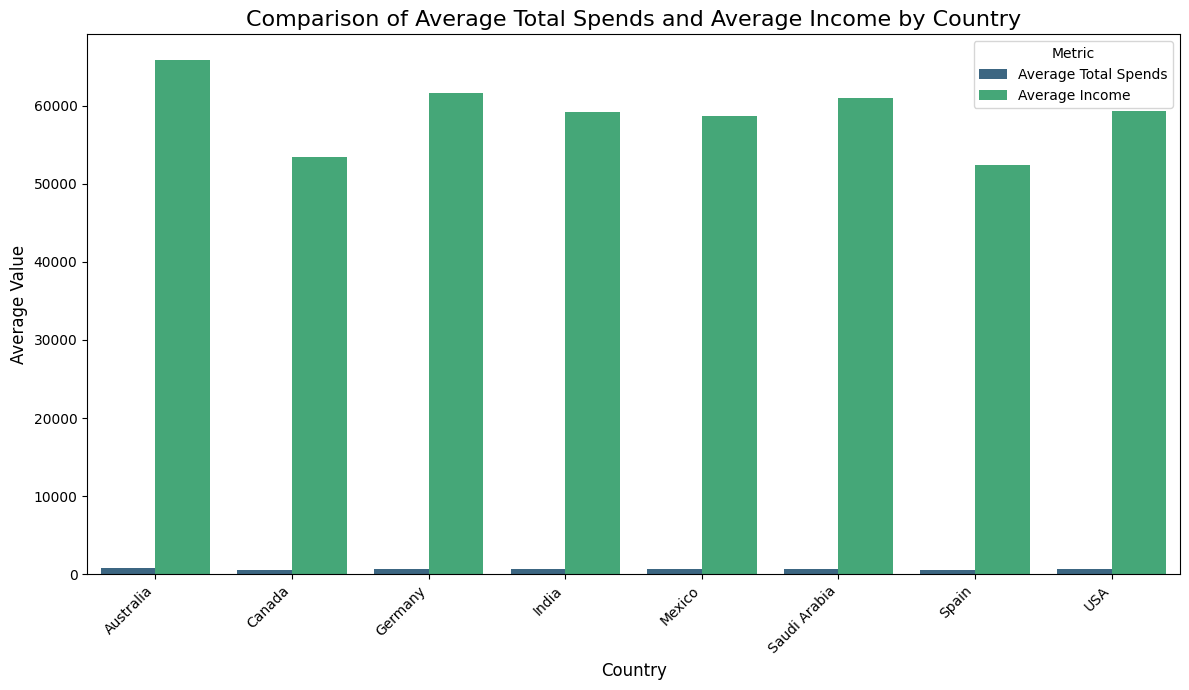

Combined bar plot for Average Total Spends and Average Income by Country generated successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the 'Country', 'Total_spends', and 'Income' columns
sql_query = "SELECT Country, Total_spends, Income FROM marketing_data"

# 3. Execute the query and load the results into a pandas DataFrame
country_data_df = pd.read_sql_query(sql_query, conn)

# 4. Calculate the average of 'Total_spends' for each unique 'Country' level
average_spends_by_country = country_data_df.groupby('Country')['Total_spends'].mean()

# 5. Calculate the average of 'Income' for each unique 'Country' level
average_income_by_country = country_data_df.groupby('Country')['Income'].mean()

# 6. Reset the index for both resulting DataFrames and rename the columns appropriately
average_spends_by_country = average_spends_by_country.reset_index()
average_spends_by_country.columns = ['Country', 'Average Total Spends']

average_income_by_country = average_income_by_country.reset_index()
average_income_by_country.columns = ['Country', 'Average Income']

# 7. Close the database connection
conn.close()

# 8. Merge the two DataFrames (average spends and average income by country) on the 'Country' column
combined_country_data = pd.merge(average_spends_by_country, average_income_by_country, on='Country')

# 9. Reshape the merged DataFrame into a long format suitable for grouped bar plotting
combined_country_data_melted = combined_country_data.melt(id_vars='Country', var_name='Metric', value_name='Value')

# 10. Create a grouped bar plot using seaborn.barplot
plt.figure(figsize=(12, 7))
sns.barplot(x='Country', y='Value', hue='Metric', data=combined_country_data_melted, palette='viridis')

# 11. Set the title of the plot
plt.title('Comparison of Average Total Spends and Average Income by Country', fontsize=16)

# 12. Label the x-axis and y-axis
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Value', fontsize=12)

# 13. Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# 14. Add a legend
plt.legend(title='Metric')

# 15. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

# 16. Print a confirmation message
print('Combined bar plot for Average Total Spends and Average Income by Country generated successfully.')

**Visualize Correlation Matrix**

**Subtask:**
Compute and visualize the correlation matrix for relevant numerical features, including 'Total_spends' and 'Income', using a heatmap to identify strong relationships.


**Reasoning**:
I will retrieve the specified numerical columns from the database, calculate their correlation matrix, and then visualize it as a heatmap to identify relationships, as per the instructions.



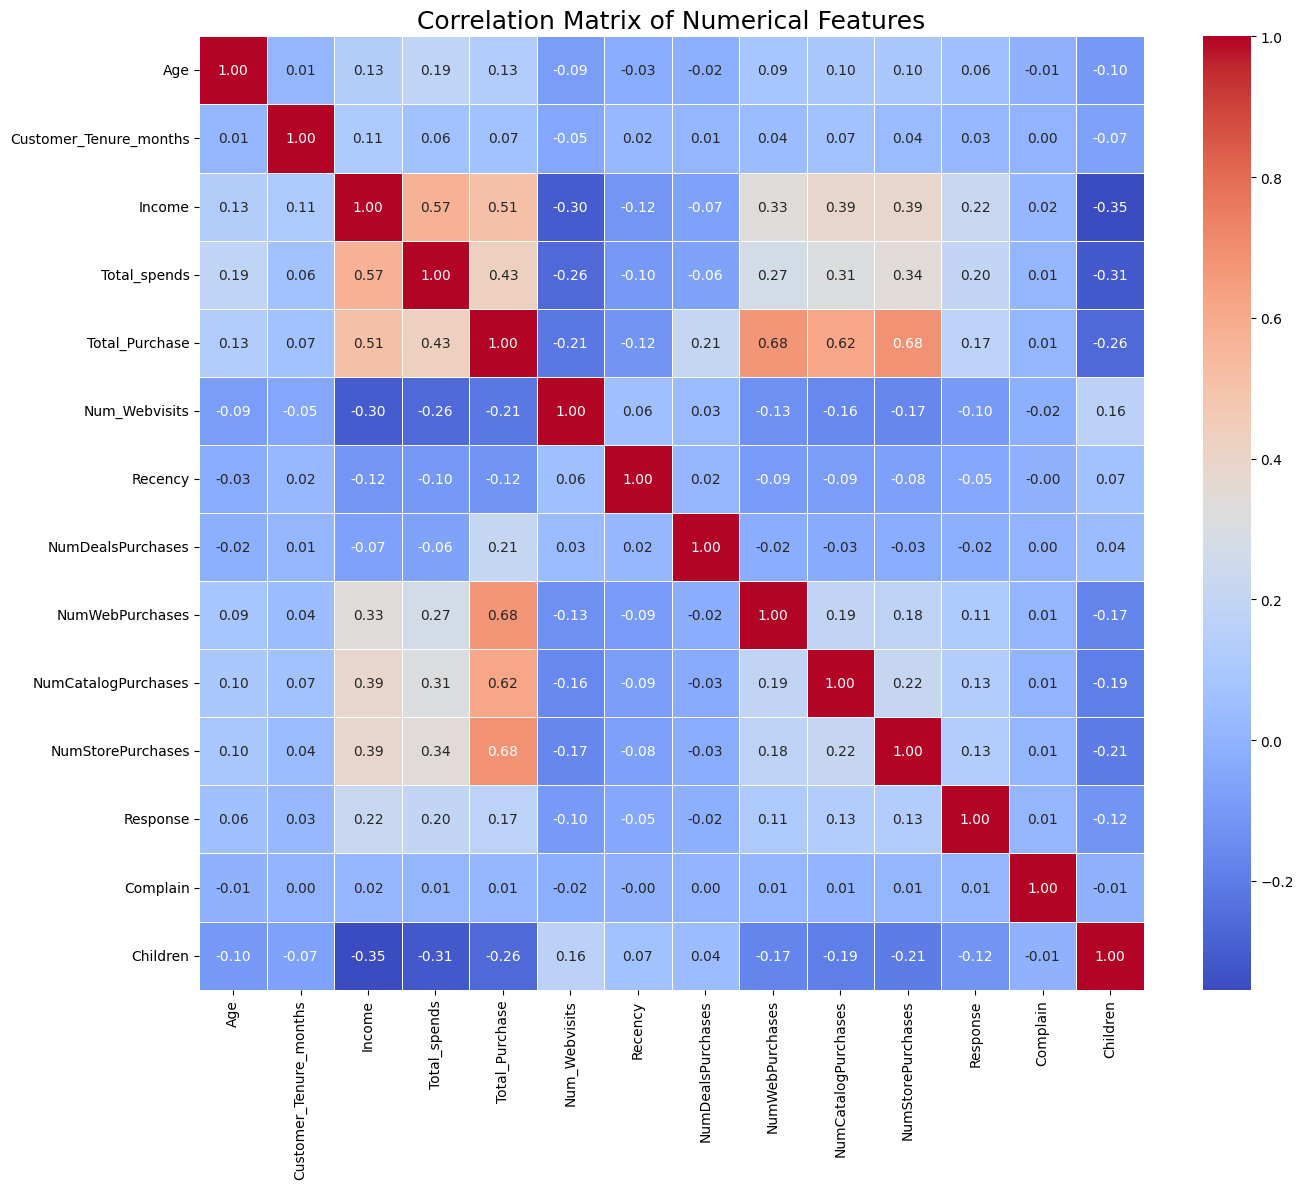

Correlation matrix of numerical features generated and plotted successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Define the relevant numerical columns
numerical_cols = [
    'Age', 'Customer_Tenure_months', 'Income', 'Total_spends',
    'Total_Purchase', 'Num_Webvisits', 'Recency', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'Response', 'Complain', 'Children'
]

# Write a SQL query to select all relevant numerical columns
sql_query = f"SELECT {', '.join(numerical_cols)} FROM marketing_data"

# 3. Execute the query and load the results into a pandas DataFrame
numerical_df = pd.read_sql_query(sql_query, conn)

# 4. Close the database connection
conn.close()

# 5. Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# 6. Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# 7. Set the title of the plot
plt.title('Correlation Matrix of Numerical Features', fontsize=18)

# 8. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

# 9. Print a confirmation message
print('Correlation matrix of numerical features generated and plotted successfully.')


**Relationship between Income and Total Spends by Age Segment**

**Subtask:**
Create a scatter plot of 'Income' versus 'Total_spends', with points colored or faceted by 'Age_Segment', to visualize how spending patterns relative to income vary across different age groups.

**Reasoning:**
To visualize the relationship between income and total spends, categorized by age segment, I will query the 'Income', 'Total_spends', and 'Age_Segment' columns from the `marketing_data` table in `marketing_campaign.db`. Then, I will generate a scatter plot using `seaborn.scatterplot`, using 'Age_Segment' to color the points, which will effectively show how these three variables interact. This will provide insights into whether income and spending patterns differ significantly between young and old customers.

**Reasoning**:
To load the specified columns from the SQLite database into a pandas DataFrame, I will use the `sqlite3` and `pandas` libraries to connect to the database, execute a SQL query, and then display the first few rows of the resulting DataFrame.



In [ ]:
import sqlite3
import pandas as pd

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the 'Age', 'Income', and 'Total_spends' columns
sql_query = "SELECT Age, Income, Total_spends FROM marketing_data"

# 3. Execute the SQL query and load the results into a pandas DataFrame
customer_data_df = pd.read_sql_query(sql_query, conn)

# 4. Close the database connection
conn.close()

# 5. Display the first few rows of the created DataFrame to verify the data
print("First 5 rows of customer_data_df:")
display(customer_data_df.head())

print('\nData loaded successfully from marketing_campaign.db.')

First 5 rows of customer_data_df:


Age   Income  Total_spends
0   41  59011.7            69
1   51   1730.0            39
2   48  98584.6          1512
3   50  74031.5           478
4   45  52784.2           330


Data loaded successfully from marketing_campaign.db.


**Reasoning**:
Now that the relevant data (income, total spends, and age segment) has been loaded or is available in `age_data_df` from the kernel state, the next step is to create the scatter plot as specified in the subtask. This involves using seaborn's `scatterplot` function to visualize the relationship between 'Income' and 'Total_spends', with points colored by 'Age_Segment'.



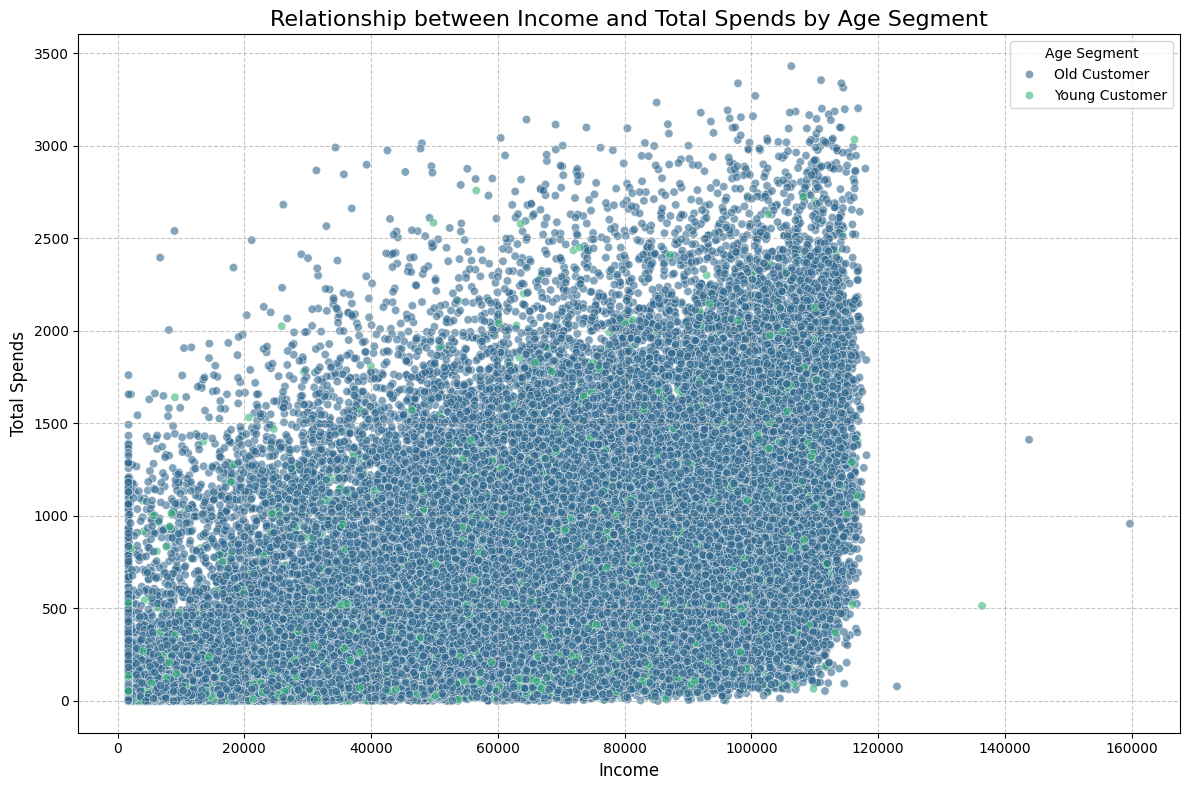

Scatter plot visualizing the relationship between Income, Total Spends, and Age Segment generated successfully.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of 'Income' versus 'Total_spends', colored by 'Age_Segment'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Total_spends', hue='Age_Segment', data=age_data_df, palette='viridis', alpha=0.6)

# Set the title and labels
plt.title('Relationship between Income and Total Spends by Age Segment', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Total Spends', fontsize=12)
plt.legend(title='Age Segment')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print('Scatter plot visualizing the relationship between Income, Total Spends, and Age Segment generated successfully.')

**Descriptive Statistics for Key Variables**

**Subtask:**
Display descriptive statistics for 'Age', 'Income', and 'Total_spends' to understand their central tendencies, distributions, and ranges.


**Reasoning**:
To understand the central tendencies, distributions, and ranges of 'Age', 'Income', and 'Total_spends', I will use the `.describe()` method on the `customer_data_df` DataFrame for these specific columns.



In [ ]:
print("Descriptive statistics for Age, Income, and Total_spends:")
display(customer_data_df[['Age', 'Income', 'Total_spends']].describe())

Descriptive statistics for Age, Income, and Total_spends:


Age         Income  Total_spends
count  56000.000000   56000.000000  56000.000000
mean      54.333304   57214.371178    640.334571
std       12.211066   34221.353525    622.643744
min       30.000000    1730.000000      0.000000
25%       45.000000   28252.025000    103.000000
50%       53.000000   58818.000000    441.500000
75%       63.000000   86905.925000   1020.000000
max       90.000000  159700.000000   3431.000000

**Relationship between Age and Total Spends with Income Indication**

**Subtask:**
Create a scatter plot of 'Age' versus 'Total_spends', with points colored by 'Income_Segment', to observe how total spending changes with age and if higher income levels correspond to higher spending within age groups.


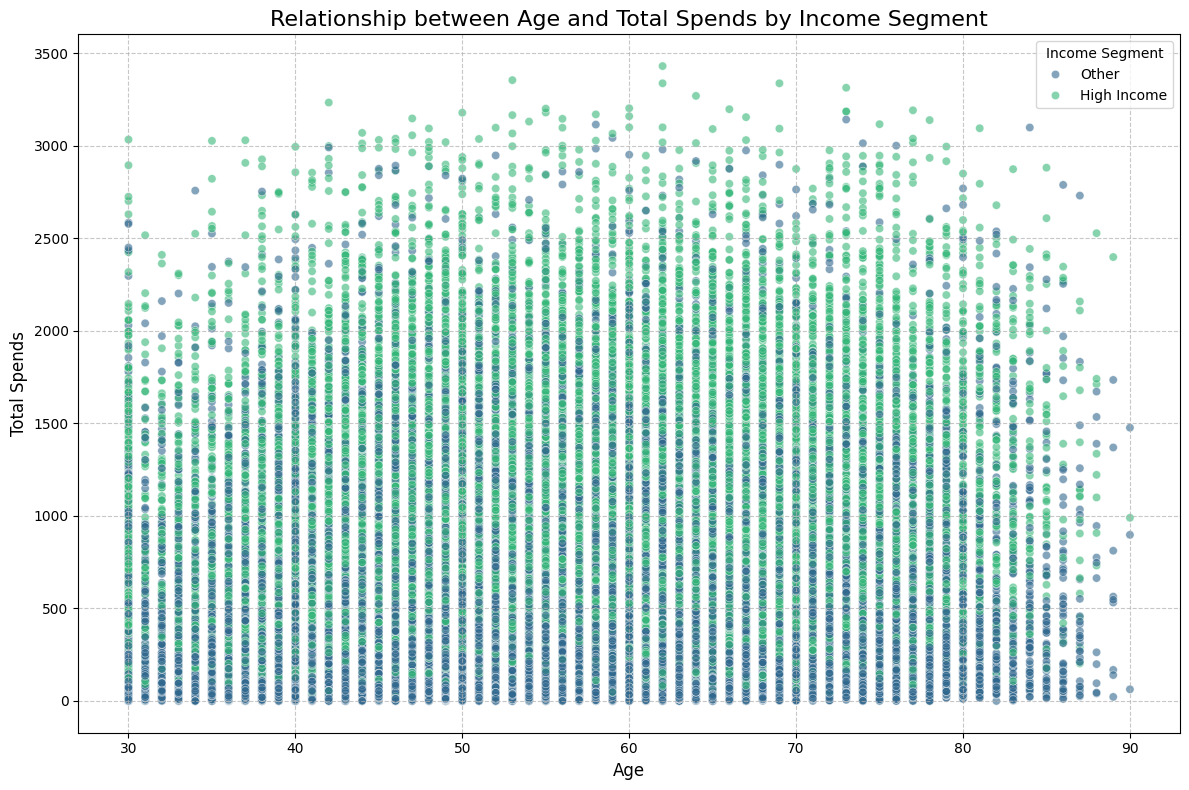

Scatter plot visualizing the relationship between Age, Total Spends, and Income Segment generated successfully.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the 'Age', 'Total_spends', and 'Income_Segment' columns
sql_query = "SELECT Age, Total_spends, Income_Segment FROM marketing_data"

# 3. Execute the SQL query and load the results into a pandas DataFrame
age_spending_income_df = pd.read_sql_query(sql_query, conn)

# 4. Close the database connection
conn.close()

# 5. Create a scatter plot using seaborn.scatterplot with 'Age' on the x-axis, 'Total_spends' on the y-axis, and points colored by 'Income_Segment'.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Total_spends', hue='Income_Segment', data=age_spending_income_df, palette='viridis', alpha=0.6)

# 6. Set the title of the plot
plt.title('Relationship between Age and Total Spends by Income Segment', fontsize=16)

# 7. Label the x-axis as 'Age' and the y-axis as 'Total Spends'
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Spends', fontsize=12)

# 8. Add a legend with the title 'Income Segment'
plt.legend(title='Income Segment')

# 9. Add a grid to the plot for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# 10. Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

print('Scatter plot visualizing the relationship between Age, Total Spends, and Income Segment generated successfully.')

**Correlation Analysis for Age, Income, and Total Spends**

**Subtask:**
Compute and visualize the correlation matrix specifically for 'Age', 'Income', and 'Total_spends' using a heatmap to quantify their pairwise relationships.


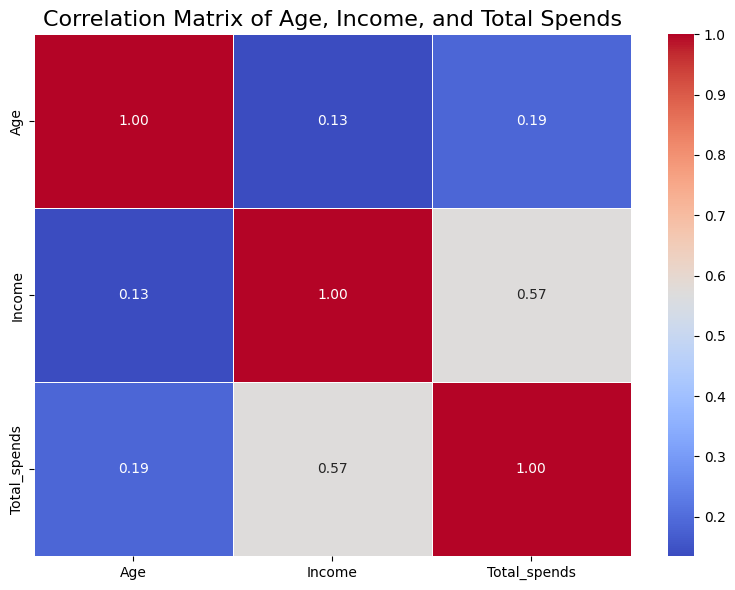

Correlation matrix for Age, Income, and Total Spends generated and plotted successfully.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select the 'Age', 'Income', and 'Total_spends' columns
selected_cols_for_corr = customer_data_df[['Age', 'Income', 'Total_spends']]

# 2. Calculate the correlation matrix
correlation_matrix_selected = selected_cols_for_corr.corr()

# 3. Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# 4. Set an appropriate title for the plot
plt.title('Correlation Matrix of Age, Income, and Total Spends', fontsize=16)

# 5. Display the plot
plt.tight_layout()
plt.show()

print('Correlation matrix for Age, Income, and Total Spends generated and plotted successfully.')

 **Retrieve Relevant Data**

**Subtask:**
Load the 'Age', 'Income', and 'Total_spends' columns from the `marketing_data` table in `marketing_campaign.db` into a pandas DataFrame for analysis.


In [ ]:
import sqlite3
import pandas as pd

# 1. Establish a connection to the SQLite database
conn = sqlite3.connect('marketing_campaign.db')

# 2. Write a SQL query to select the 'Age', 'Income', and 'Total_spends' columns
sql_query = "SELECT Age, Income, Total_spends FROM marketing_data"

# 3. Execute the SQL query and load the results into a pandas DataFrame
customer_data_df = pd.read_sql_query(sql_query, conn)

# 4. Close the database connection
conn.close()

# 5. Display the first few rows of the created DataFrame to verify the data
print("First 5 rows of customer_data_df:")
display(customer_data_df.head())

print('\nData loaded successfully from marketing_campaign.db.')

First 5 rows of customer_data_df:


Age   Income  Total_spends
0   41  59011.7            69
1   51   1730.0            39
2   48  98584.6          1512
3   50  74031.5           478
4   45  52784.2           330


Data loaded successfully from marketing_campaign.db.


**Descriptive Statistics for Key Variables**

**Subtask:**
Display descriptive statistics for 'Age', 'Income', and 'Total_spends' to understand their central tendencies, distributions, and ranges.


In [ ]:
print("Descriptive statistics for Age, Income, and Total_spends:")
display(customer_data_df[['Age', 'Income', 'Total_spends']].describe())

Descriptive statistics for Age, Income, and Total_spends:


Age         Income  Total_spends
count  56000.000000   56000.000000  56000.000000
mean      54.333304   57214.371178    640.334571
std       12.211066   34221.353525    622.643744
min       30.000000    1730.000000      0.000000
25%       45.000000   28252.025000    103.000000
50%       53.000000   58818.000000    441.500000
75%       63.000000   86905.925000   1020.000000
max       90.000000  159700.000000   3431.000000

In [ ]:
import pandas as pd

# Load the cleaned marketing campaign data
marketing_df = pd.read_csv('marketing_campaign_data_cleaned.csv')

# Display general information about the DataFrame
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      56000 non-null  int64  
 1   Age                     56000 non-null  int64  
 2   Customer_Tenure_months  56000 non-null  int64  
 3   Year_Birth              56000 non-null  int64  
 4   Education               56000 non-null  object 
 5   Marital_Status          56000 non-null  object 
 6   Income                  56000 non-null  float64
 7   Total_spends            56000 non-null  int64  
 8   Total_Purchase          56000 non-null  int64  
 9   Num_Webvisits           56000 non-null  int64  
 10  Customer_Since          56000 non-null  object 
 11  Recency                 56000 non-null  int64  
 12  MntWines                56000 non-null  int64  
 13  MntFruits               56000 non-null  int64  
 14  MntMeatProducts         56000 non-null

In [ ]:
marketing_df['Income'] = marketing_df['Income'].astype(int)

print("Income column successfully converted to int64:")
display(marketing_df[['ID', 'Income']].head())

Income column successfully converted to int64:


ID  Income
0    342199   59011
1   8075450    1730
2  13664263   98584
3  16164787   74031
4  15815139   52784

In [ ]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      56000 non-null  int64 
 1   Age                     56000 non-null  int64 
 2   Customer_Tenure_months  56000 non-null  int64 
 3   Year_Birth              56000 non-null  int64 
 4   Education               56000 non-null  object
 5   Marital_Status          56000 non-null  object
 6   Income                  56000 non-null  int64 
 7   Total_spends            56000 non-null  int64 
 8   Total_Purchase          56000 non-null  int64 
 9   Num_Webvisits           56000 non-null  int64 
 10  Customer_Since          56000 non-null  object
 11  Recency                 56000 non-null  int64 
 12  MntWines                56000 non-null  int64 
 13  MntFruits               56000 non-null  int64 
 14  MntMeatProducts         56000 non-null  int64 
 15  Mn

In [ ]:
marketing_df.to_csv('marketing_campaign_data_final.csv', index=False)
print('DataFrame saved successfully to marketing_campaign_data_final.csv')

DataFrame saved successfully to marketing_campaign_data_final.csv
